# Double Pulse Test 

In [1]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import dataclasses
import matplotlib.pyplot as plt

import itertools
from switchsim import *

duts_data = {
    "gan_gs66516t": {
        "file_path": "workspace/double_pulse_test_gan_gs66516t.asc",
        "output_fields": DoublePulseTestOutputFields(
            time="time",
            dut_drain_voltage="V(node_dut_drain)",
            dut_drain_current="Ix(dut:DRAININ)",
            dut_gate_voltage="V(node_dut_gate)",
            dut_source_voltage="V(node_dut_source)",
        ),
    },
    "gan_v22tc65s1a1": {
        "file_path": "workspace/double_pulse_test_gan_v22tc65s1a1.asc",
        "output_fields": DoublePulseTestOutputFields(
            time="time",
            dut_drain_voltage="V(node_dut_drain)",
            dut_drain_current="Ix(dut:D)",
            dut_gate_voltage="V(node_dut_gate)",
            dut_source_voltage="V(node_dut_source)",
        ),
    }
}

1.1000000000000001e-05 1.25e-05


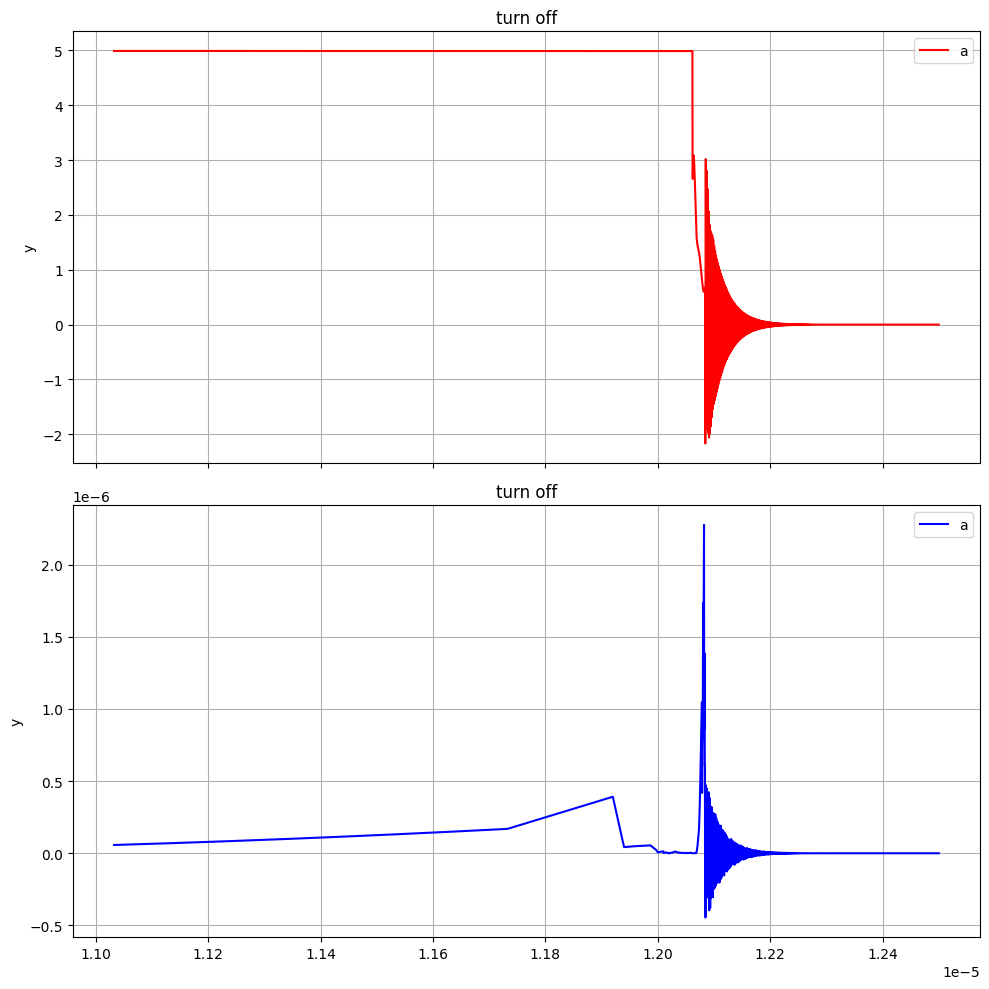

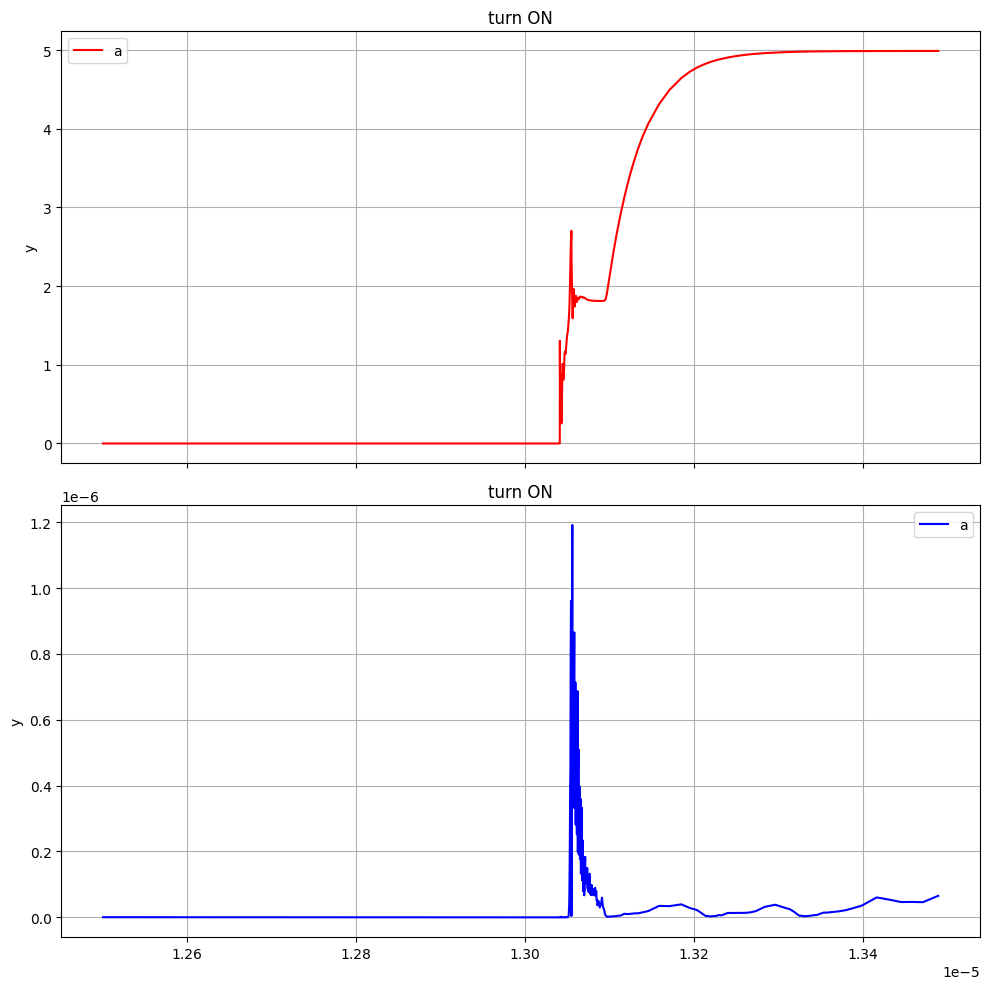

1.1000000000000001e-05 1.25e-05


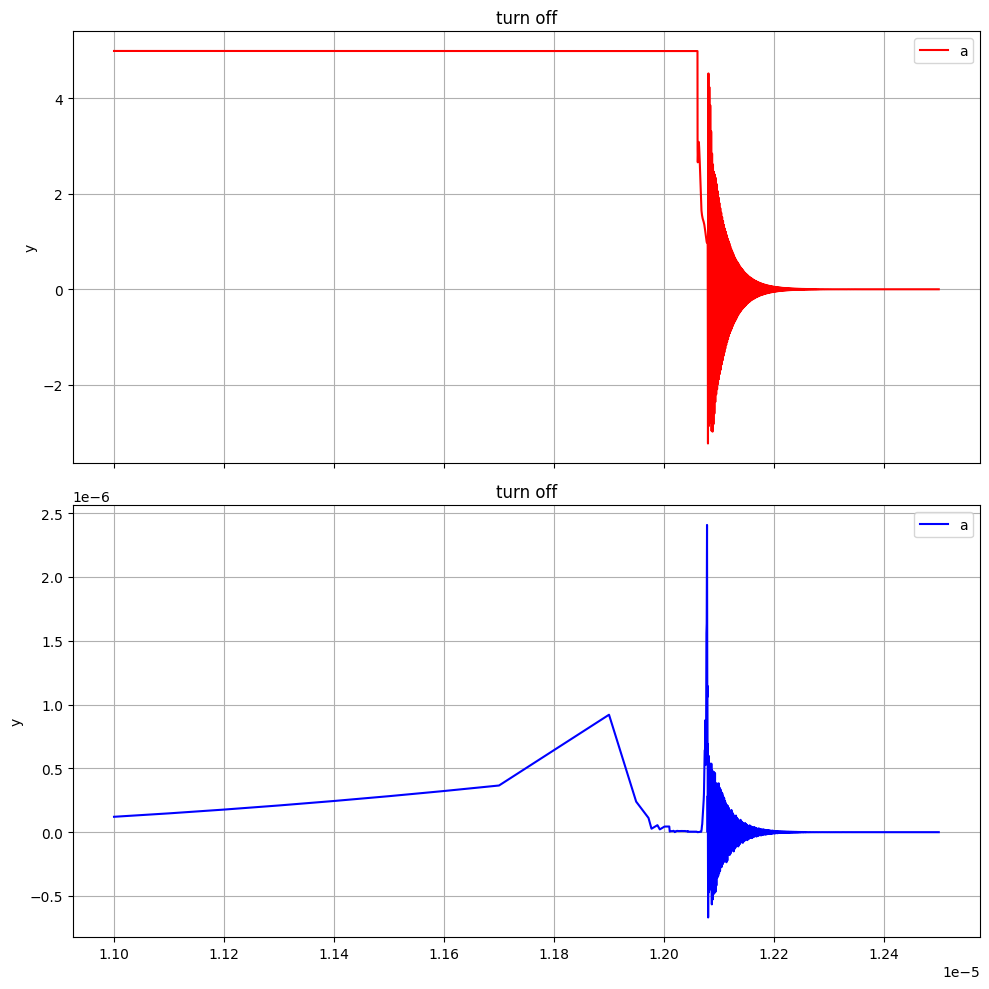

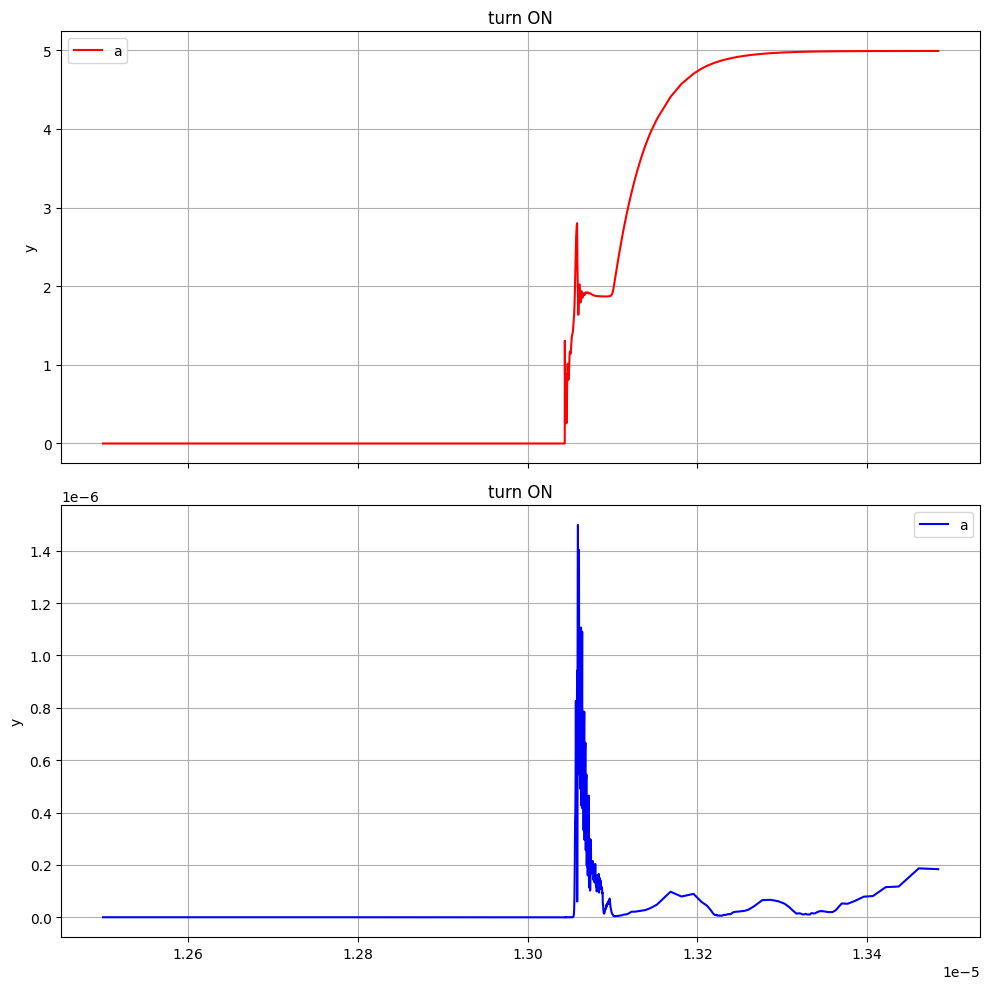

1.1000000000000001e-05 1.25e-05


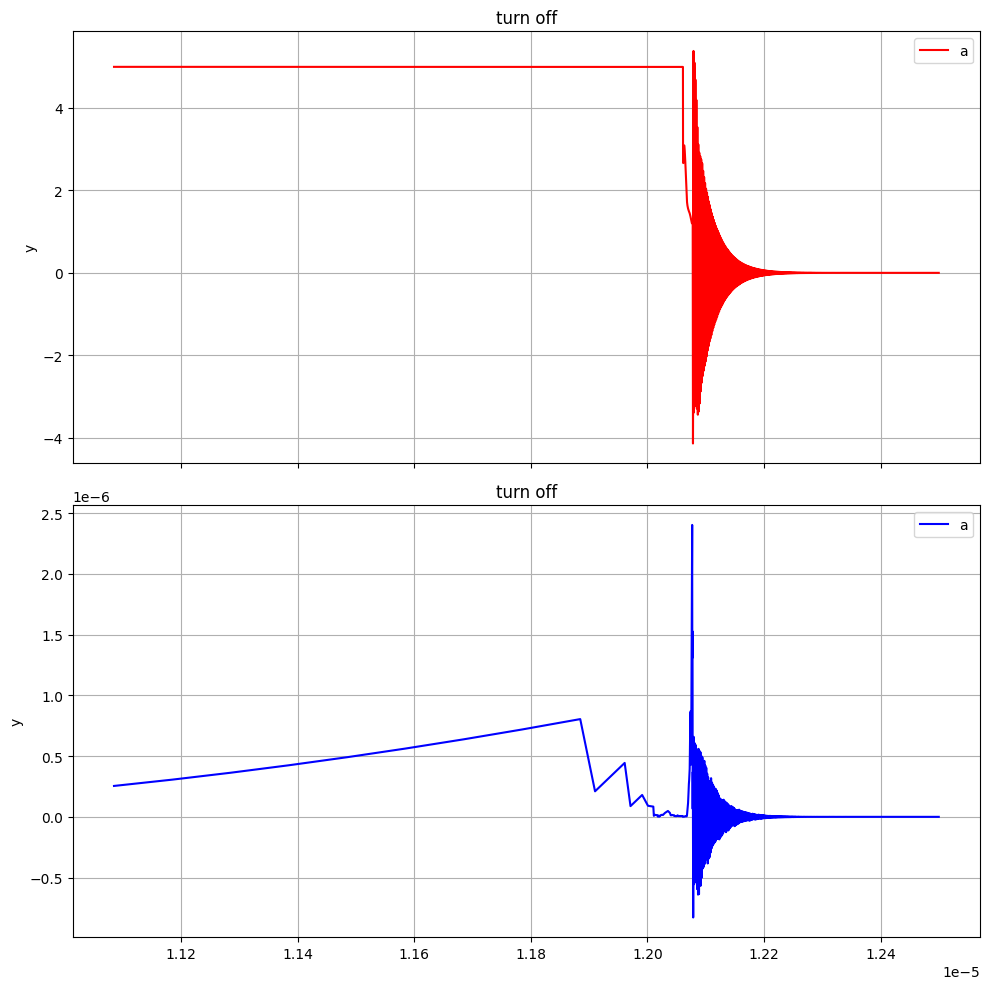

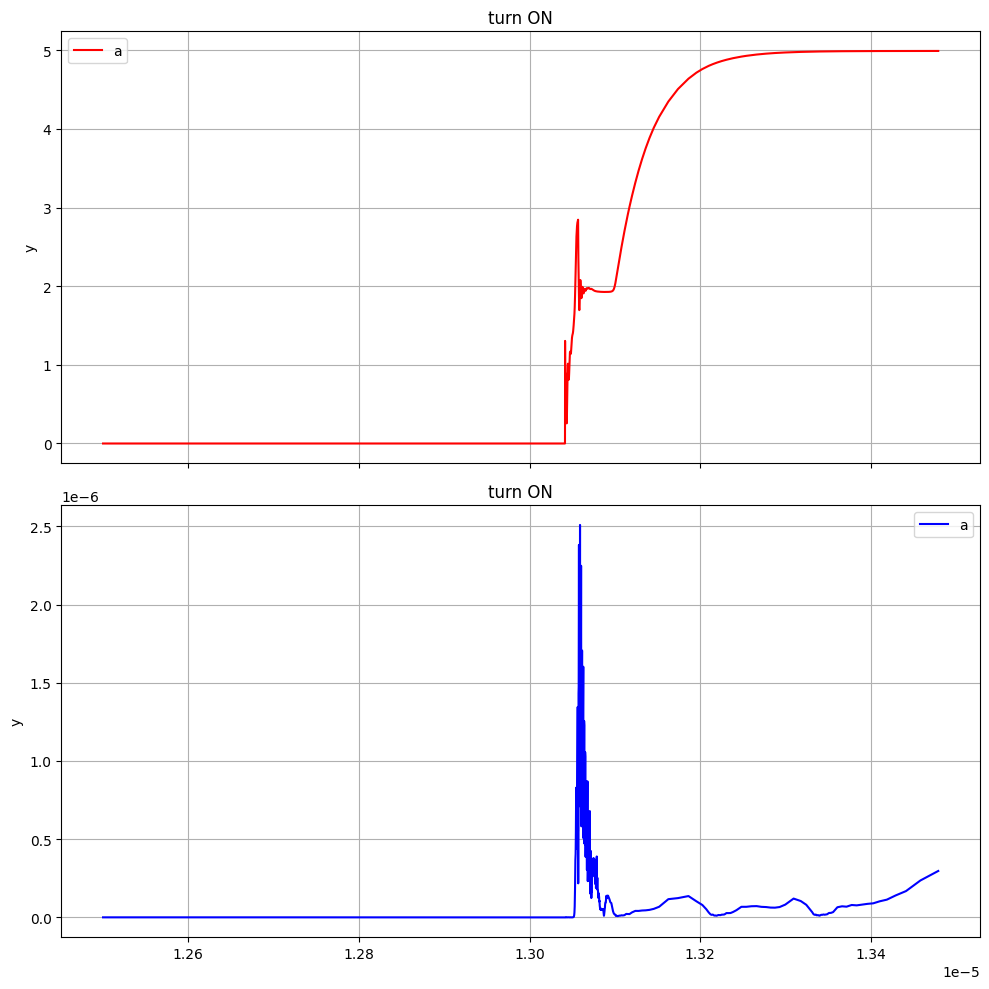

1.1000000000000001e-05 1.25e-05


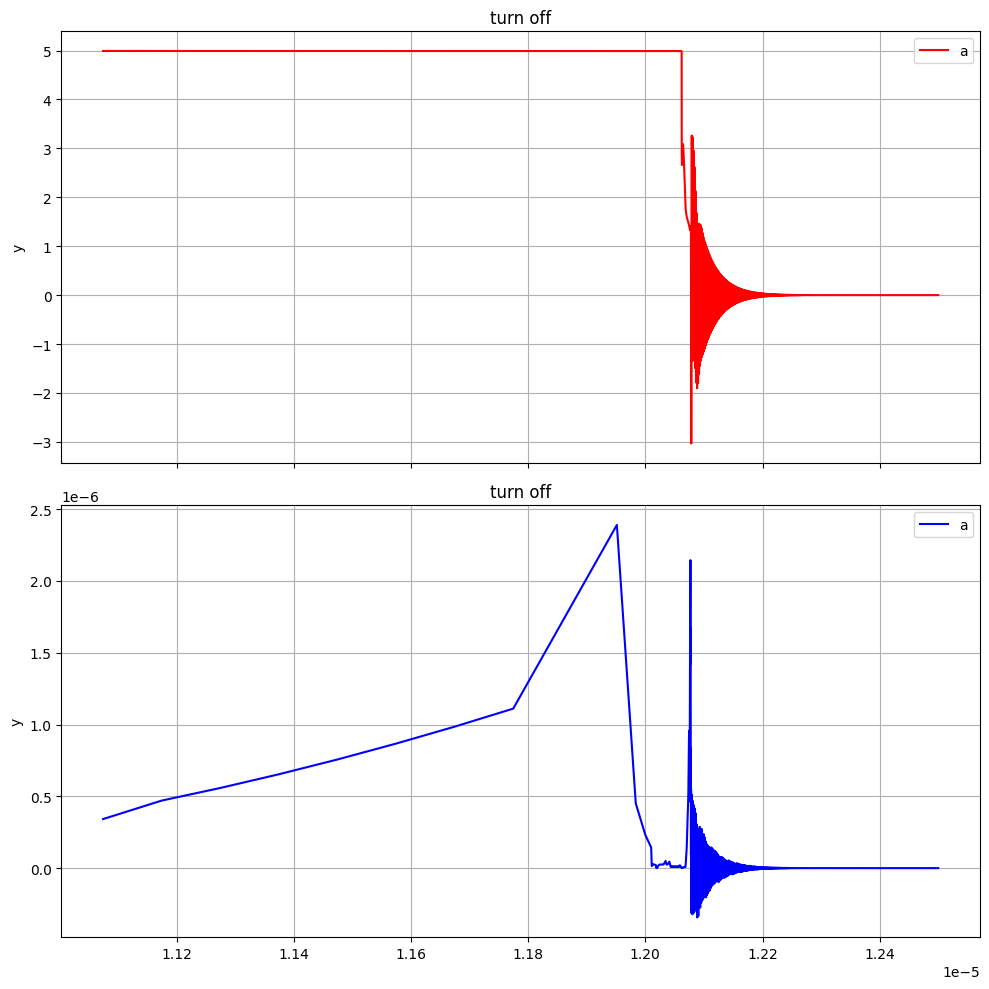

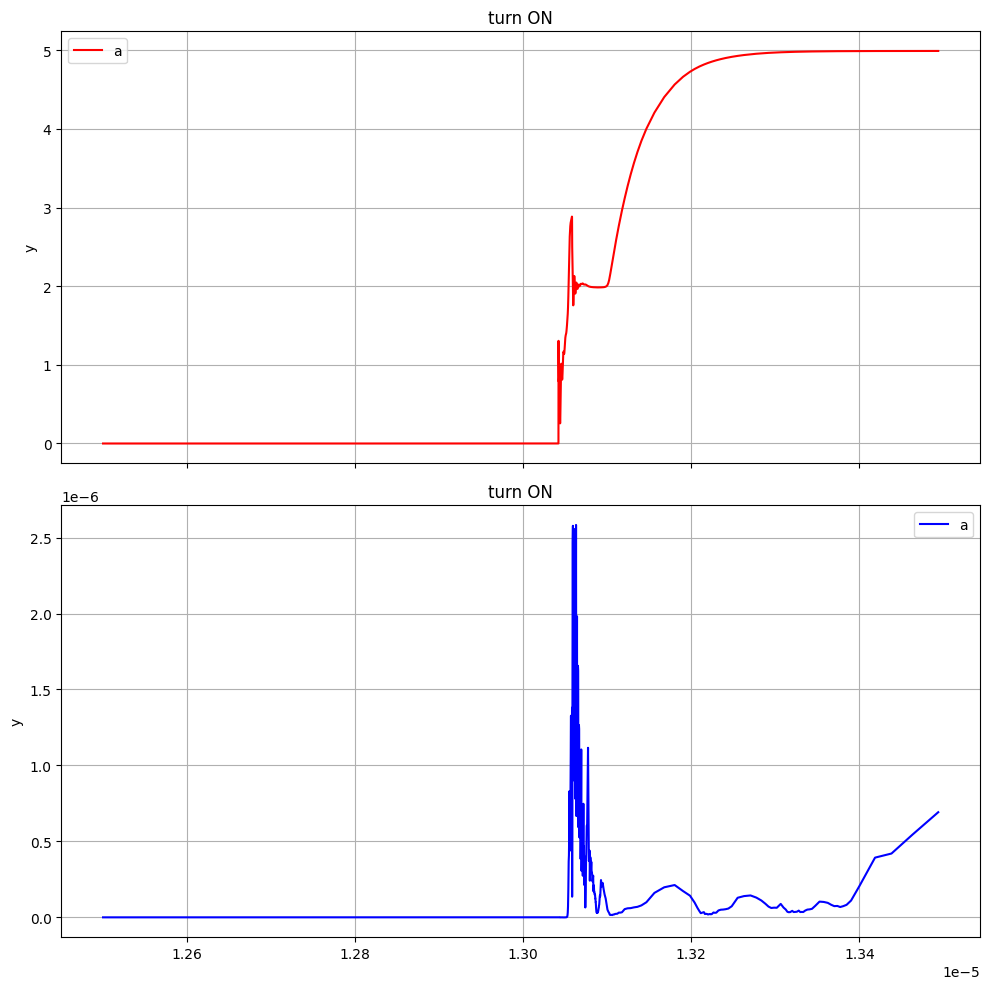

1.1000000000000001e-05 1.25e-05


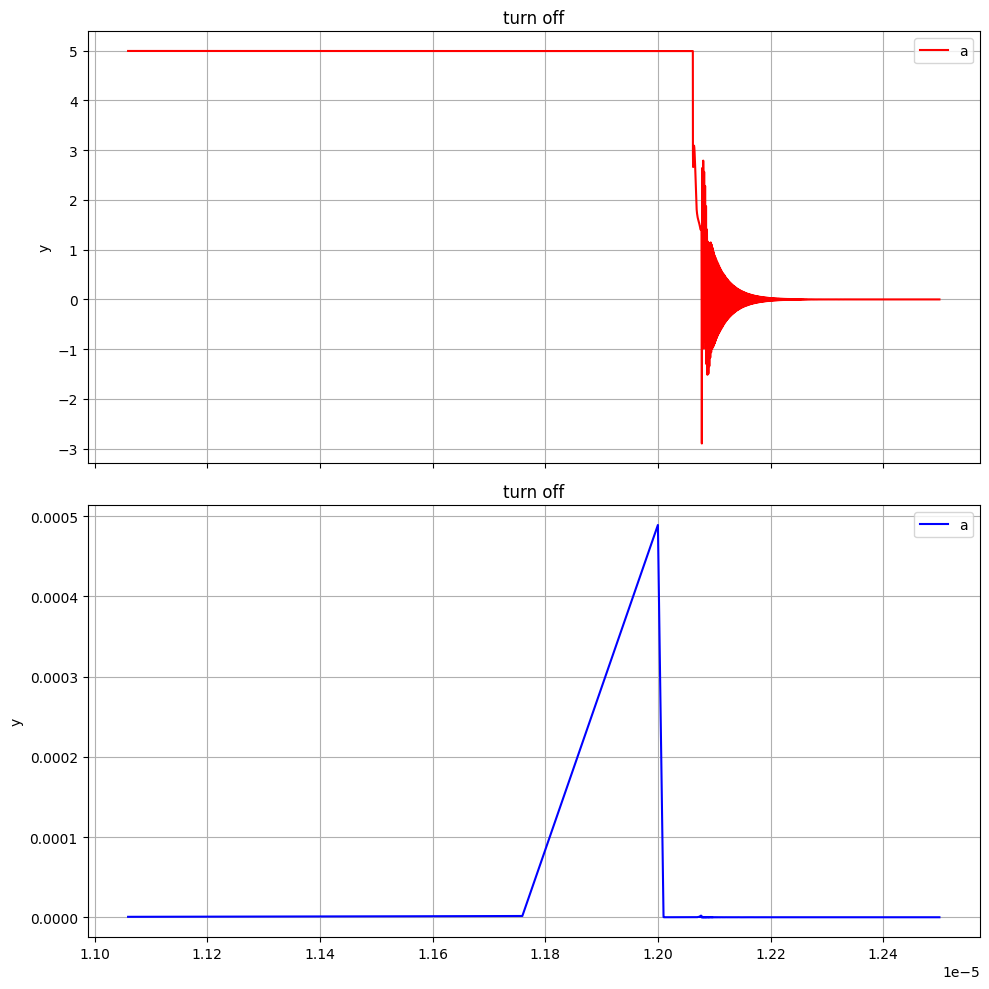

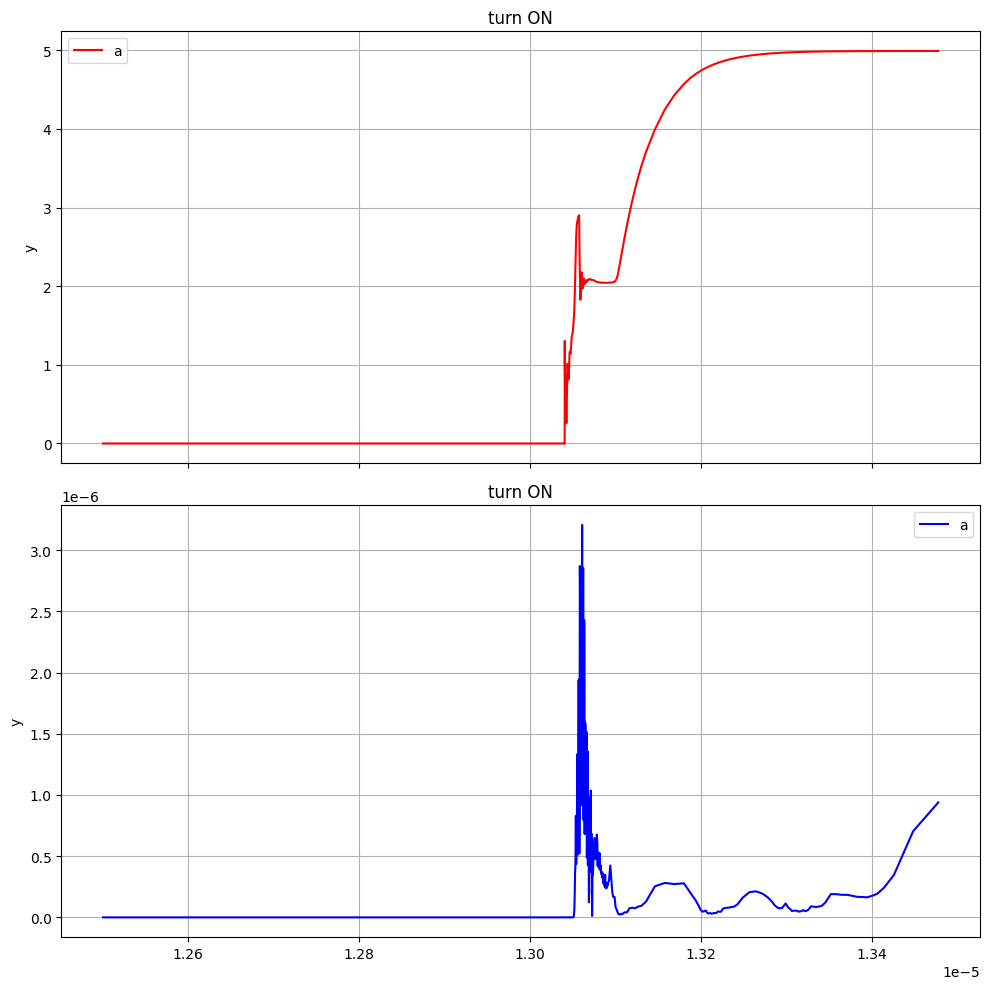

1.1000000000000001e-05 1.25e-05


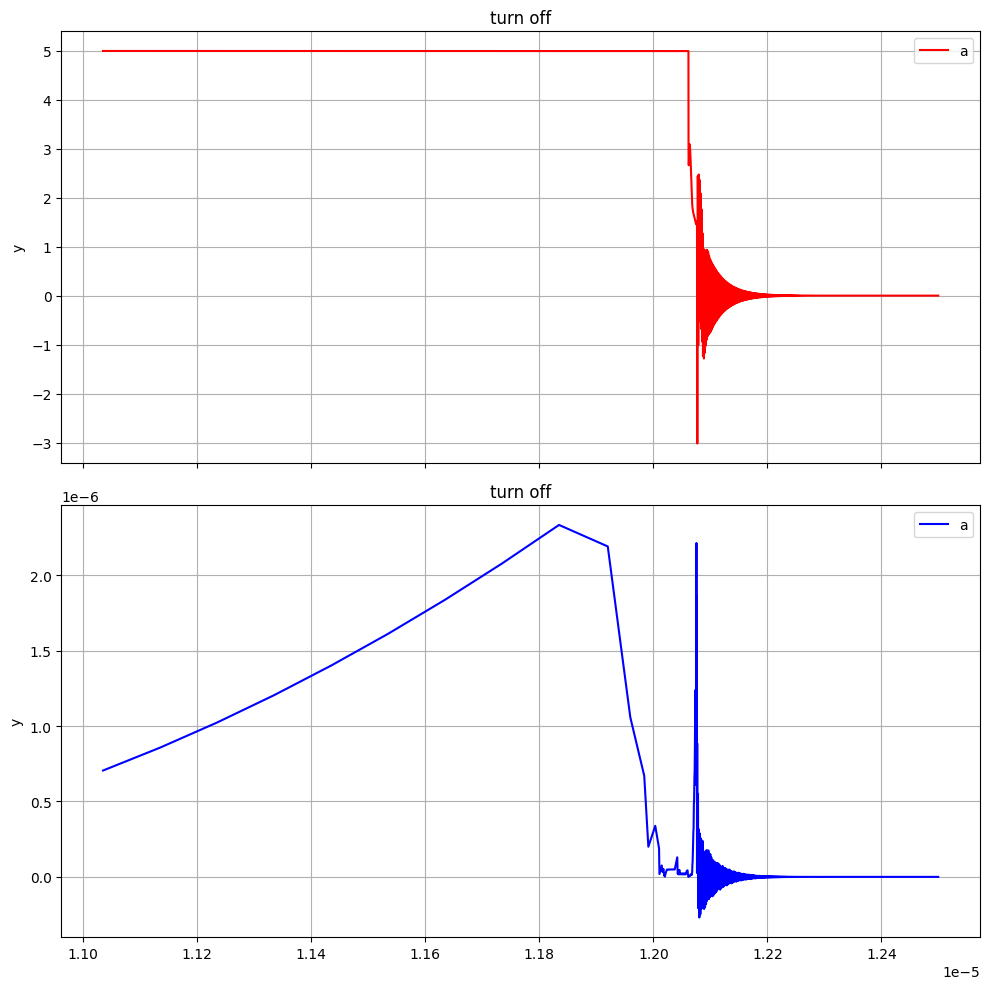

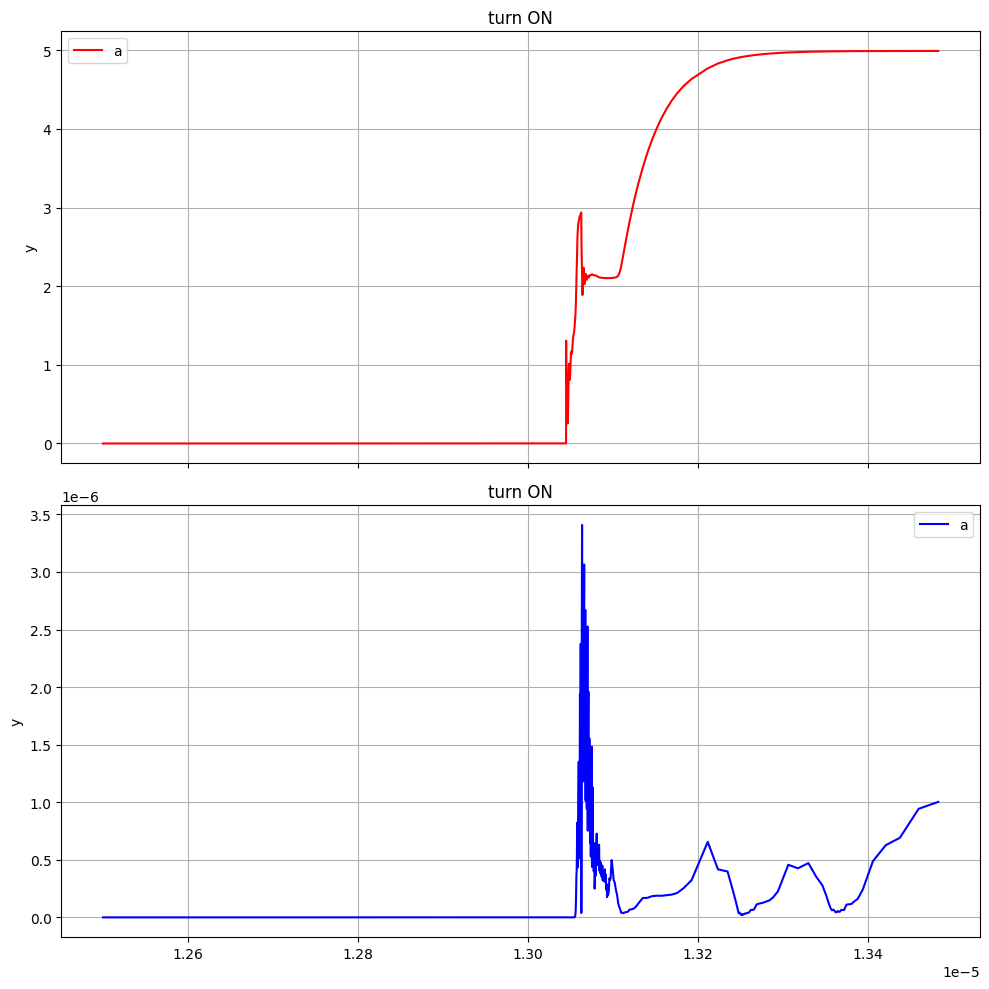

1.1000000000000001e-05 1.25e-05


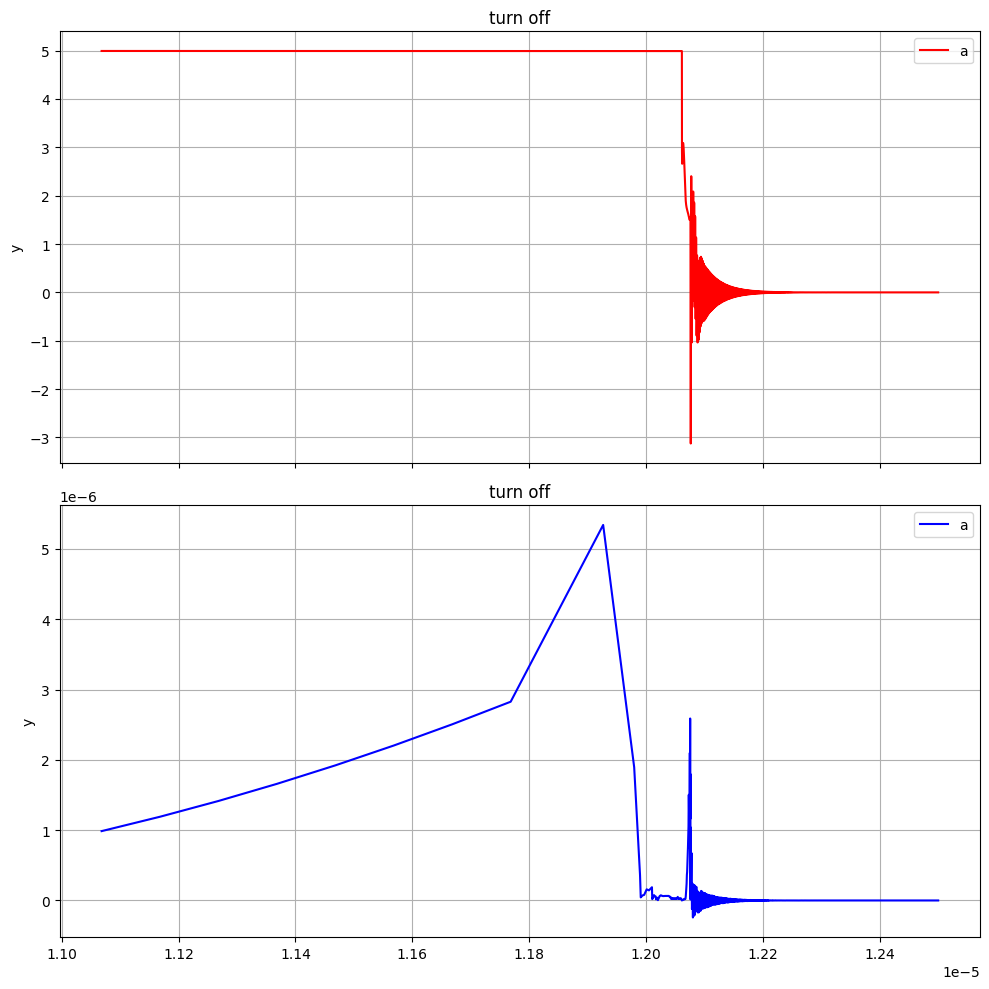

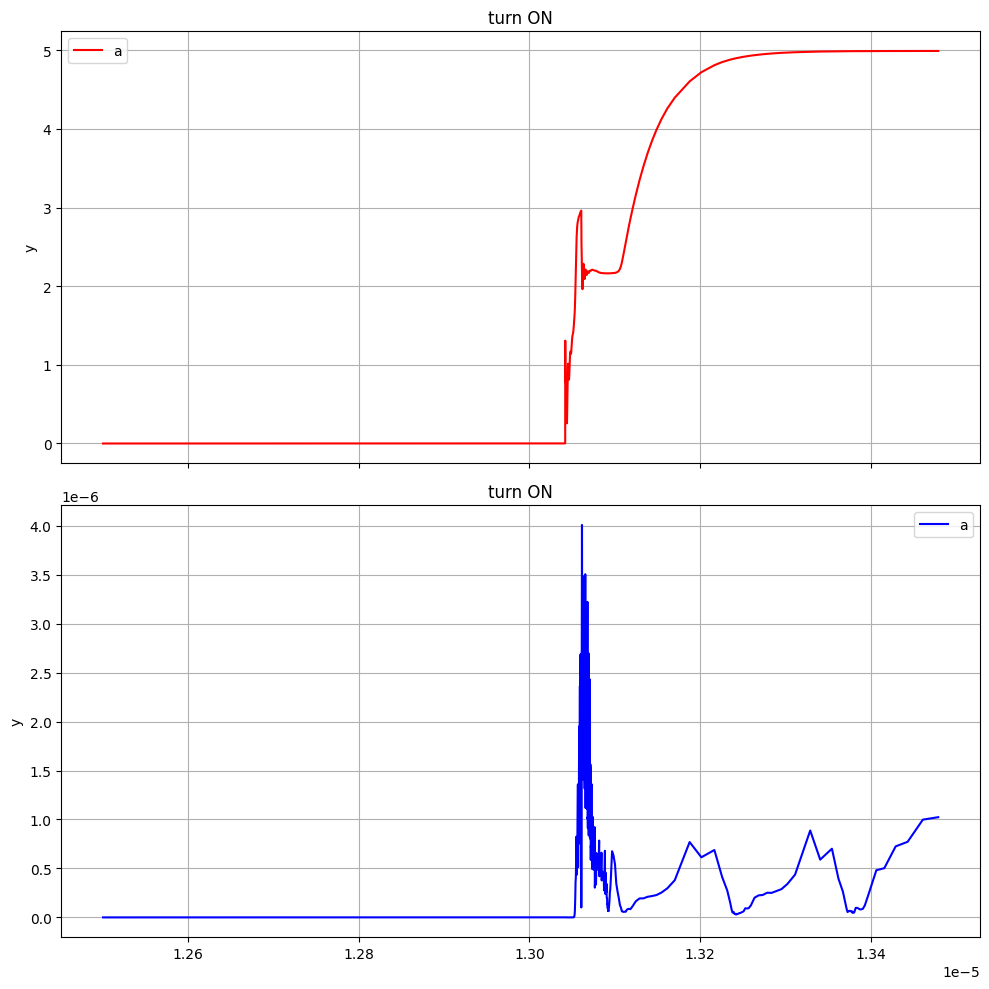

1.1000000000000001e-05 1.25e-05


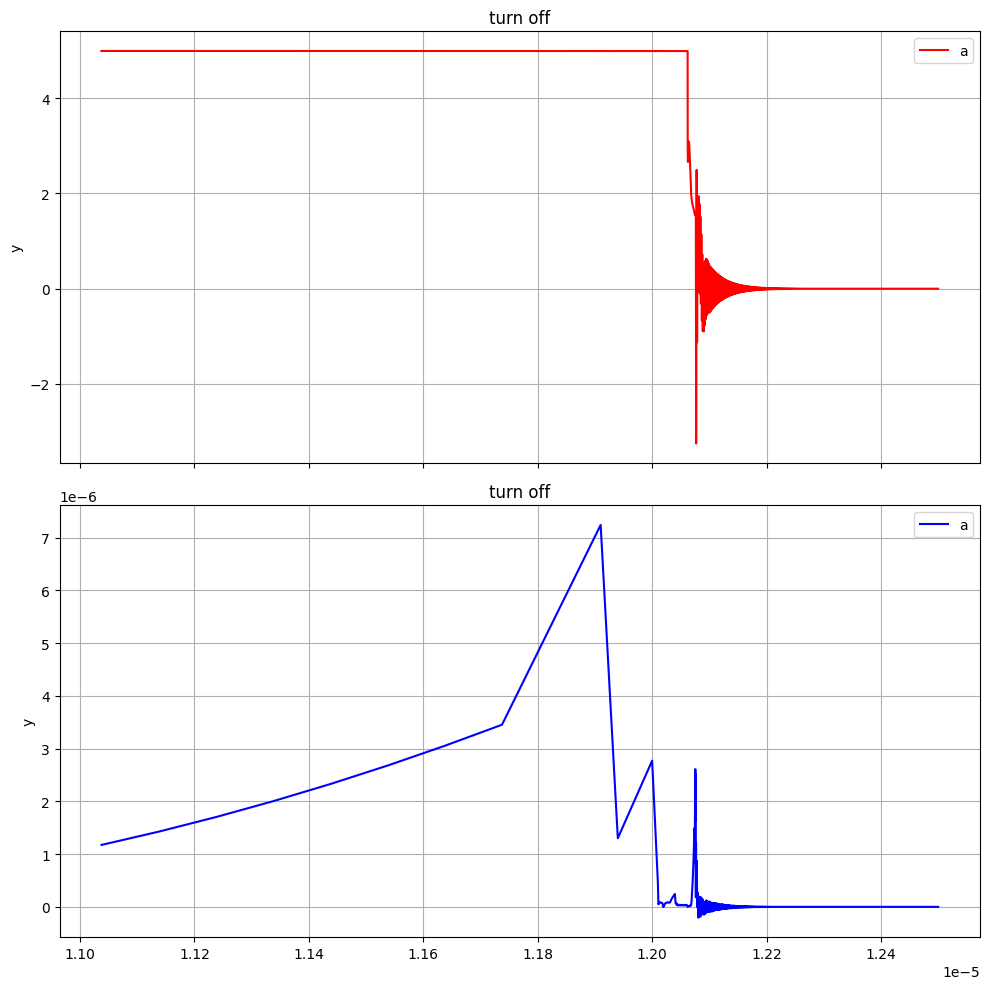

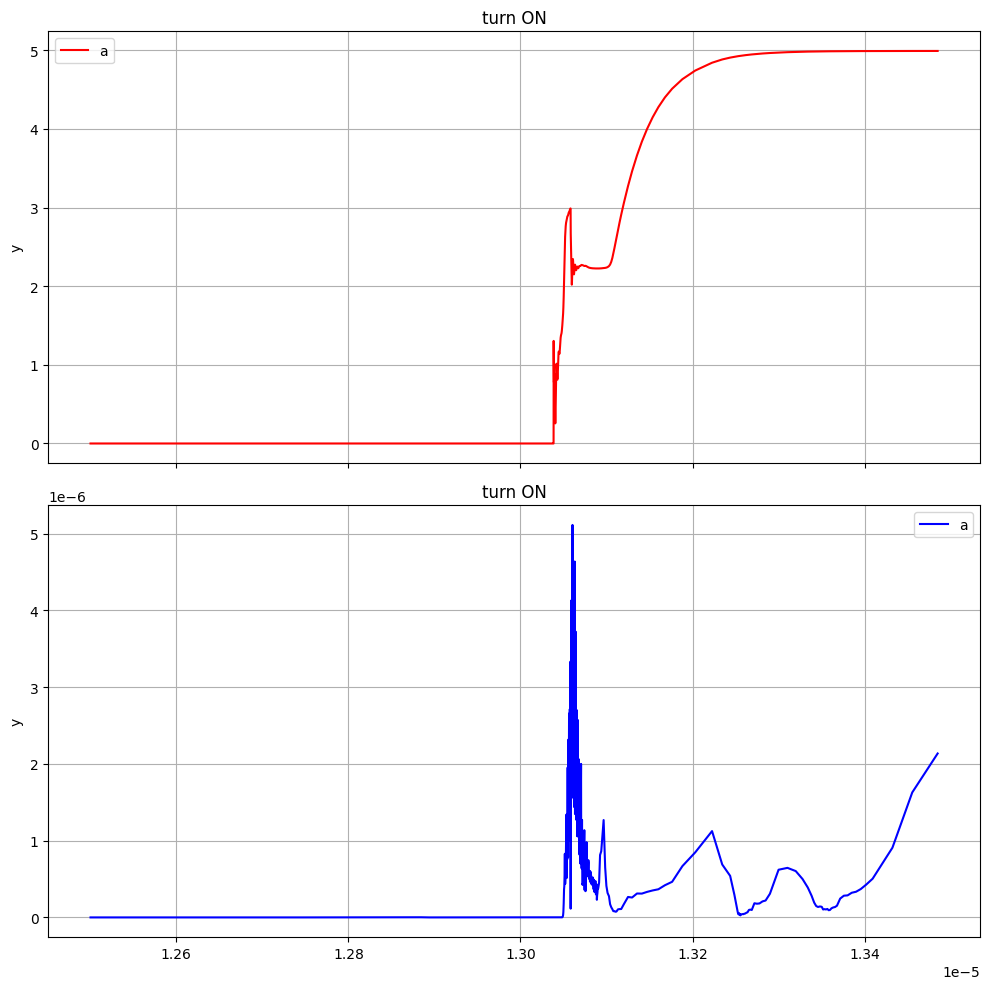

1.1000000000000001e-05 1.25e-05


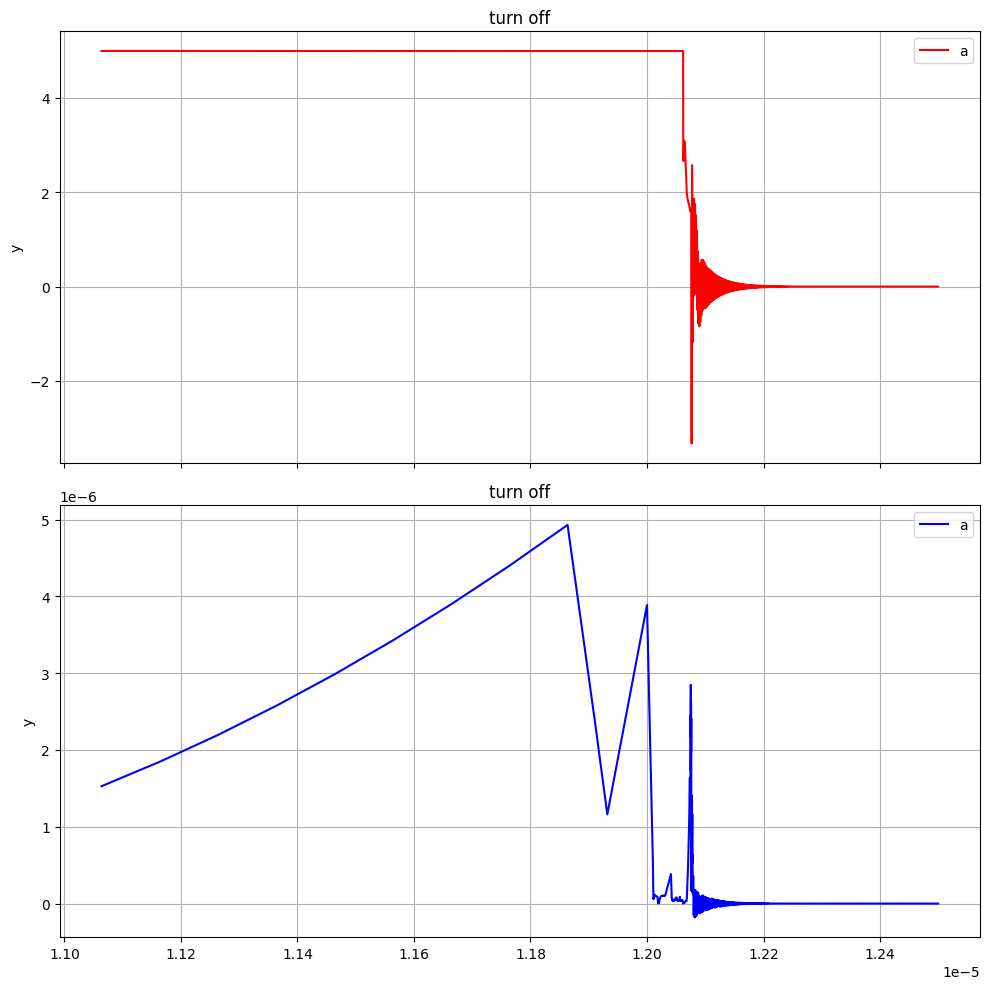

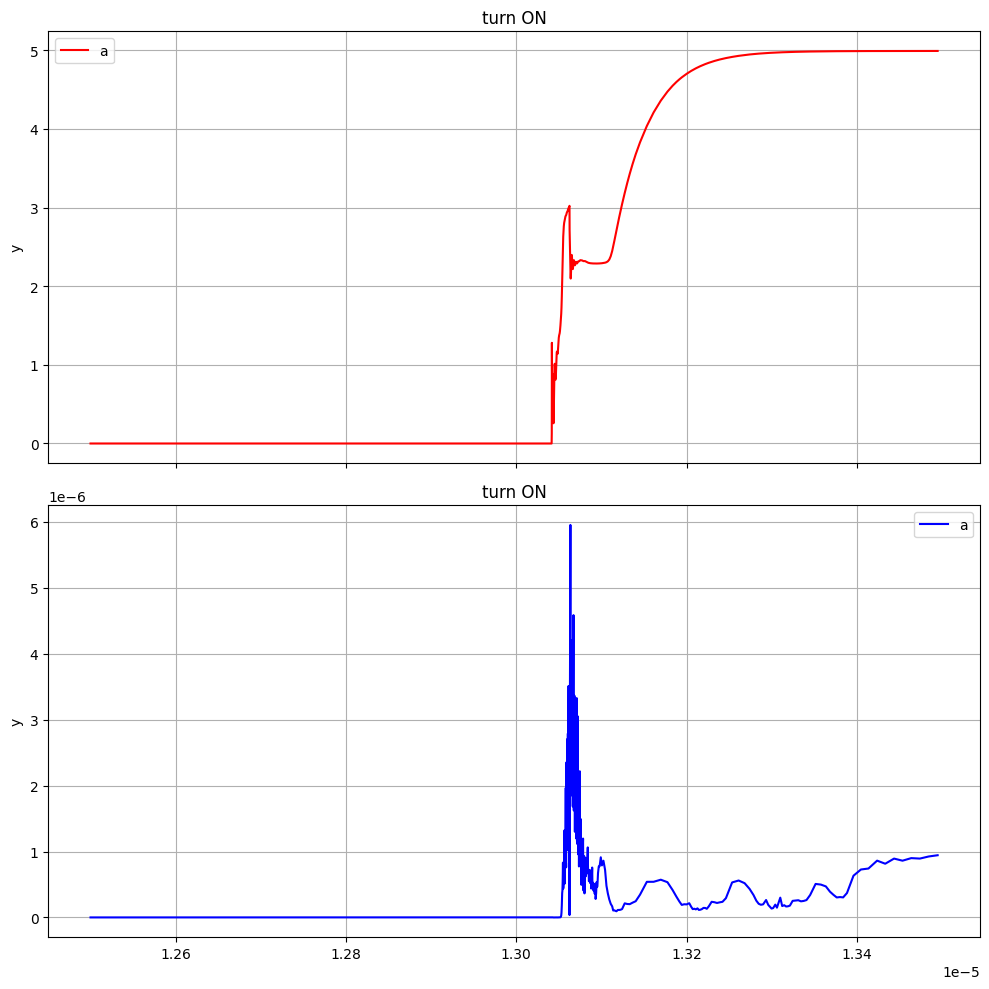

1.1000000000000001e-05 1.25e-05


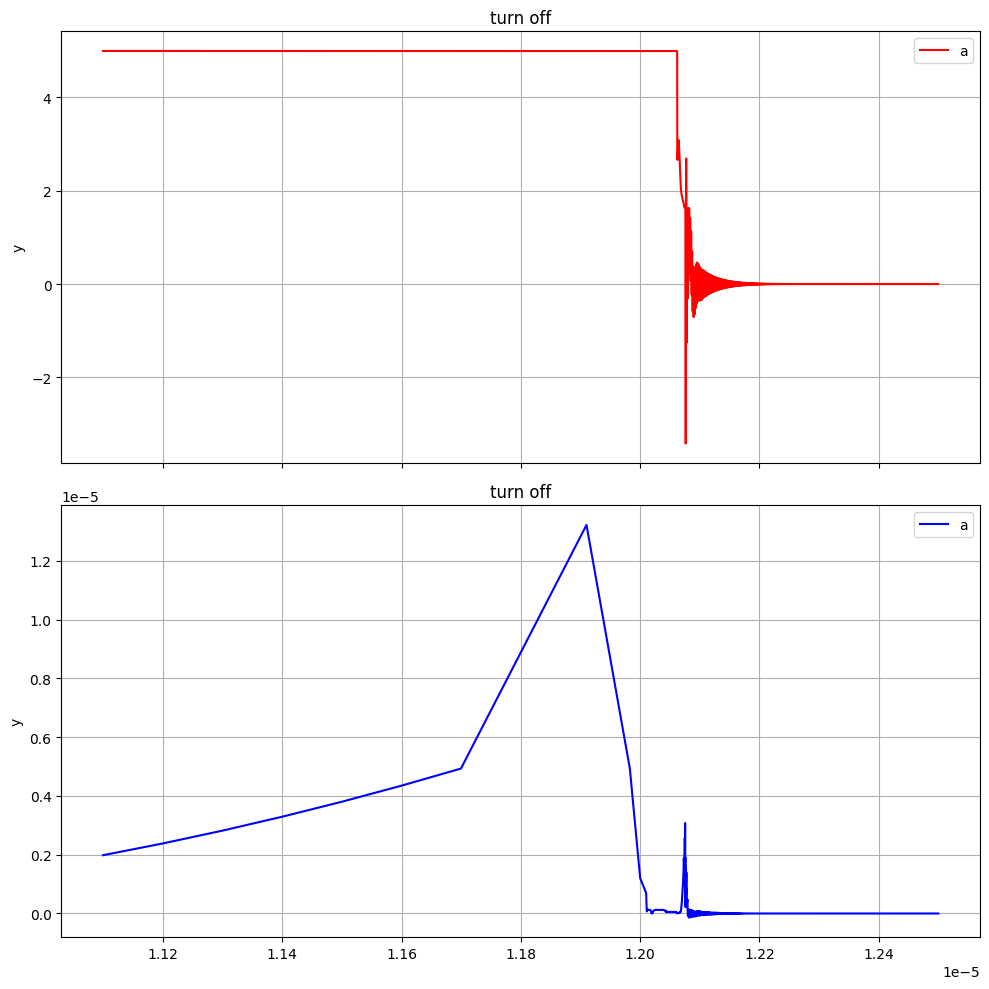

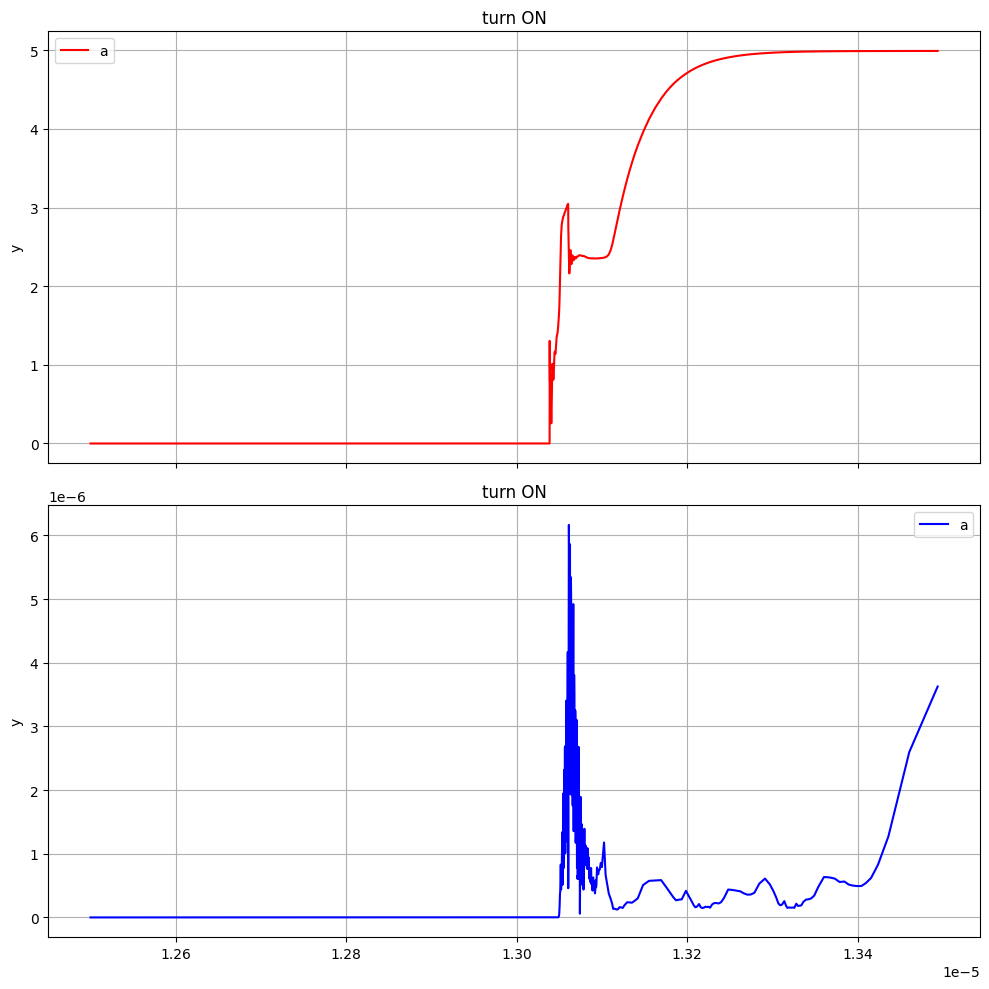

1.1000000000000001e-05 1.25e-05


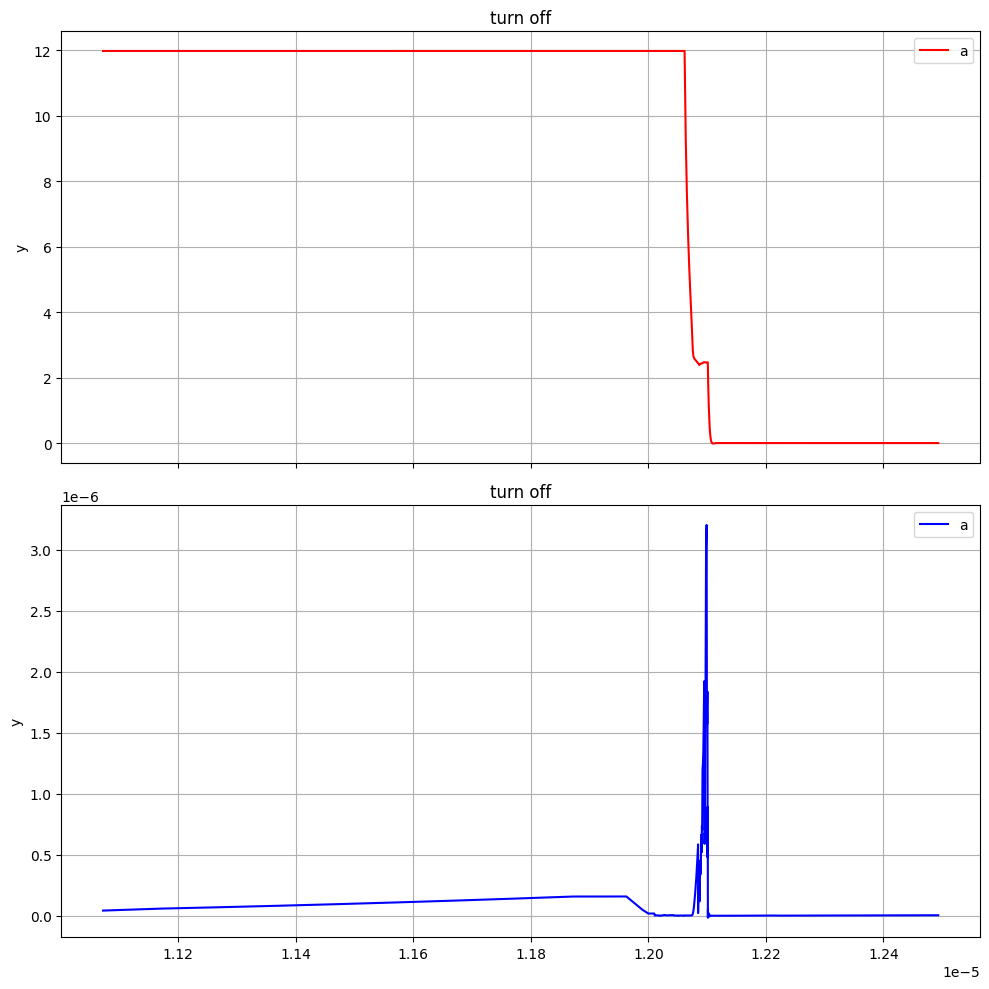

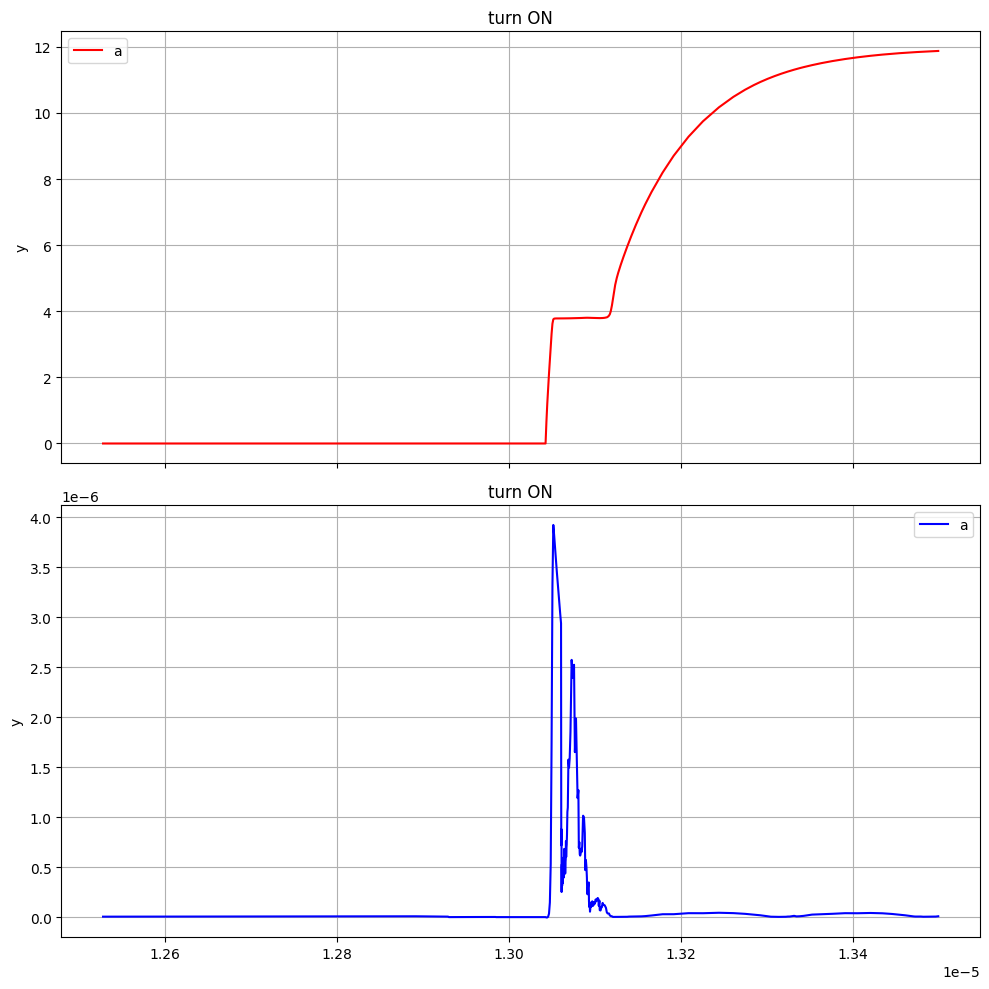

1.1000000000000001e-05 1.25e-05


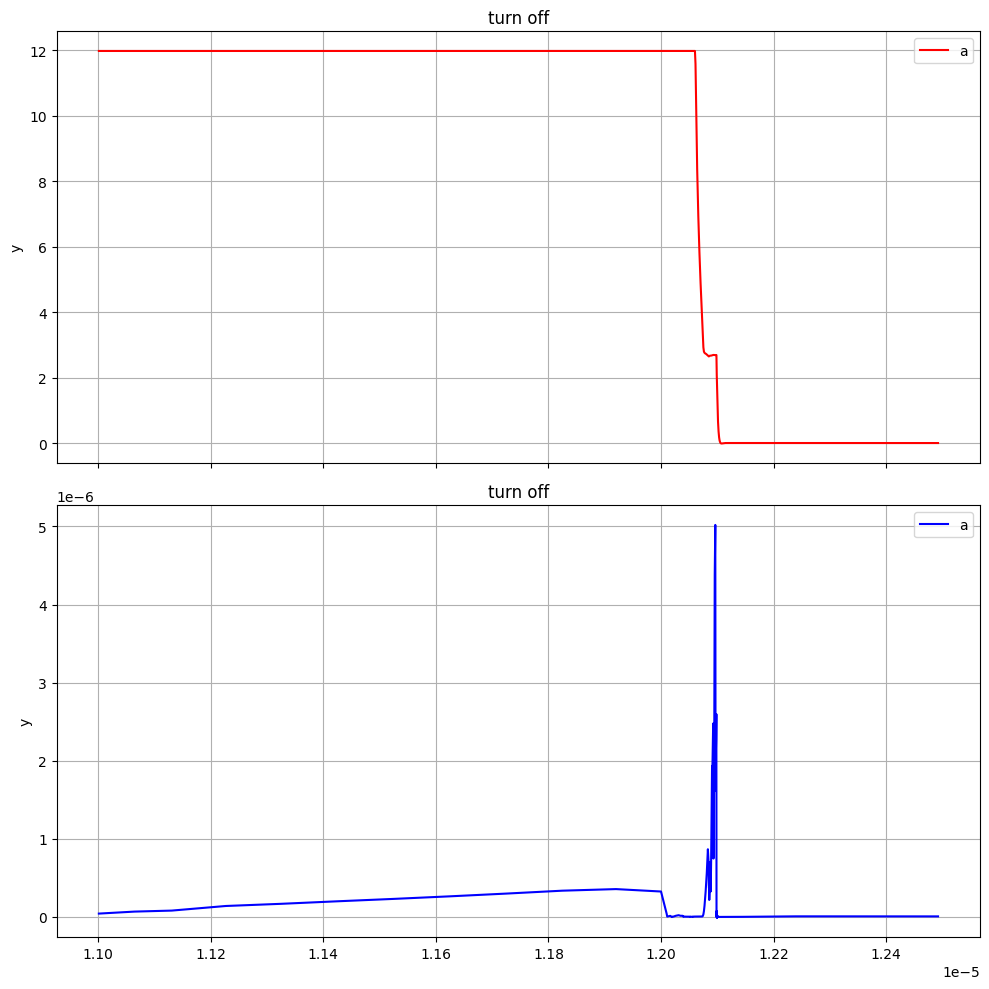

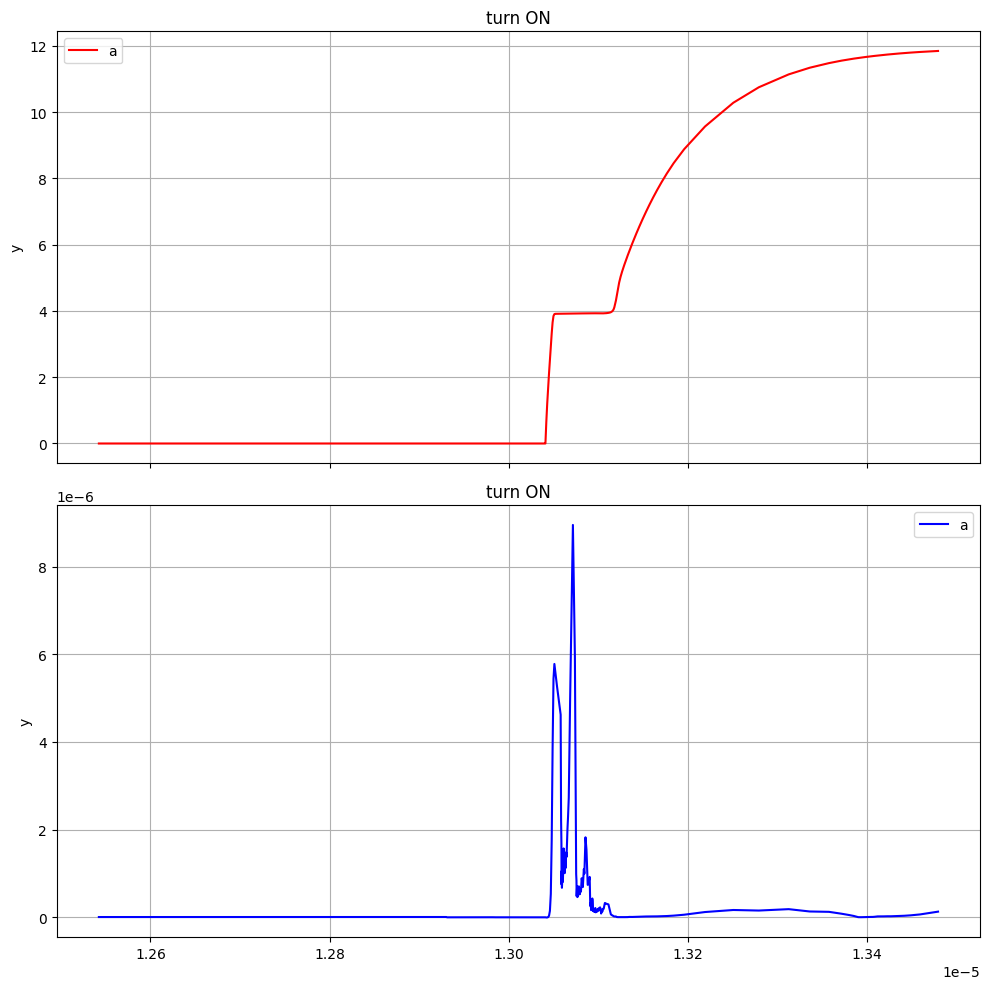

1.1000000000000001e-05 1.25e-05


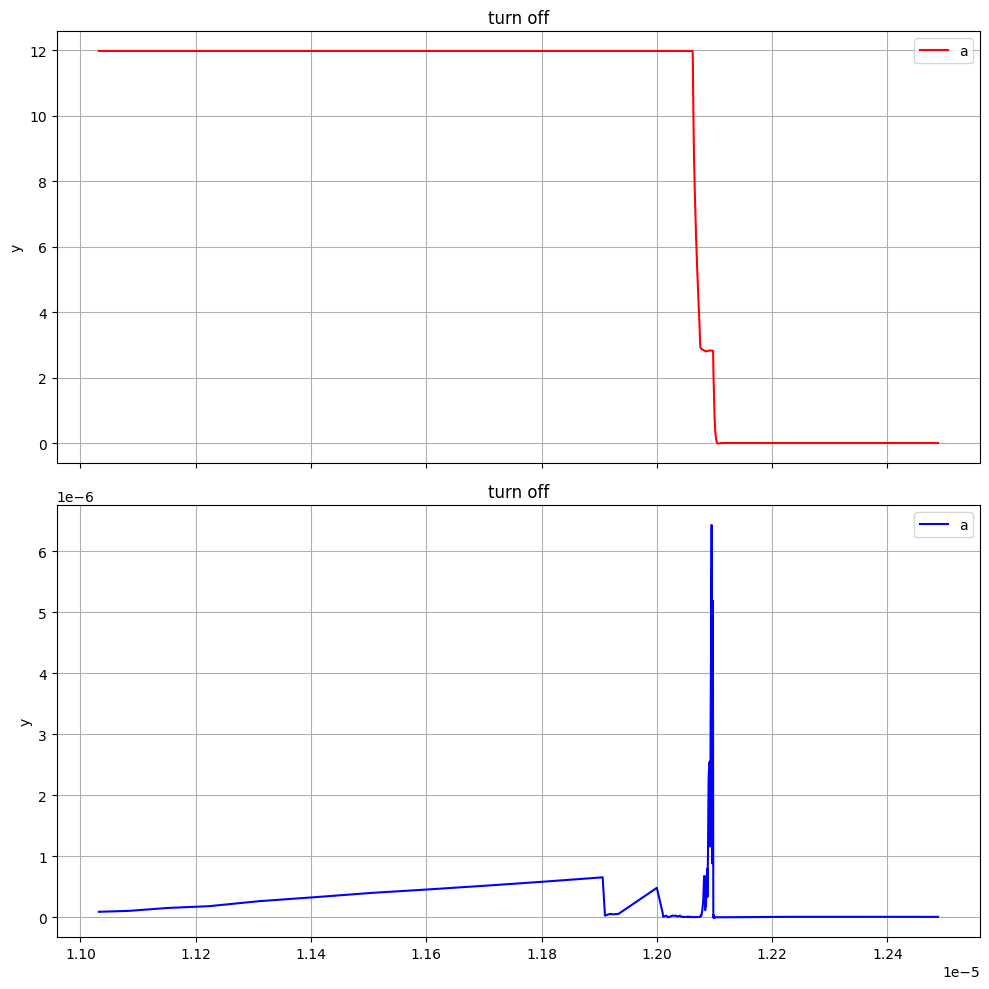

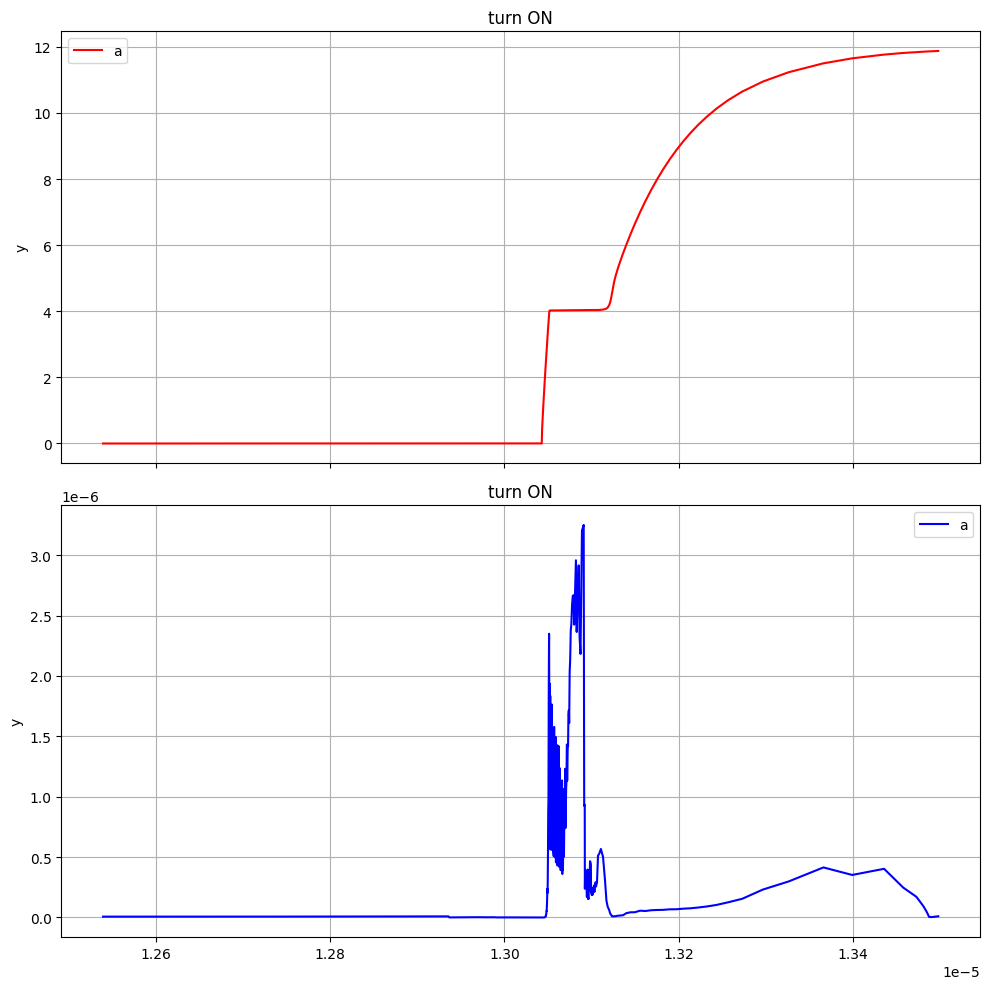

1.1000000000000001e-05 1.25e-05


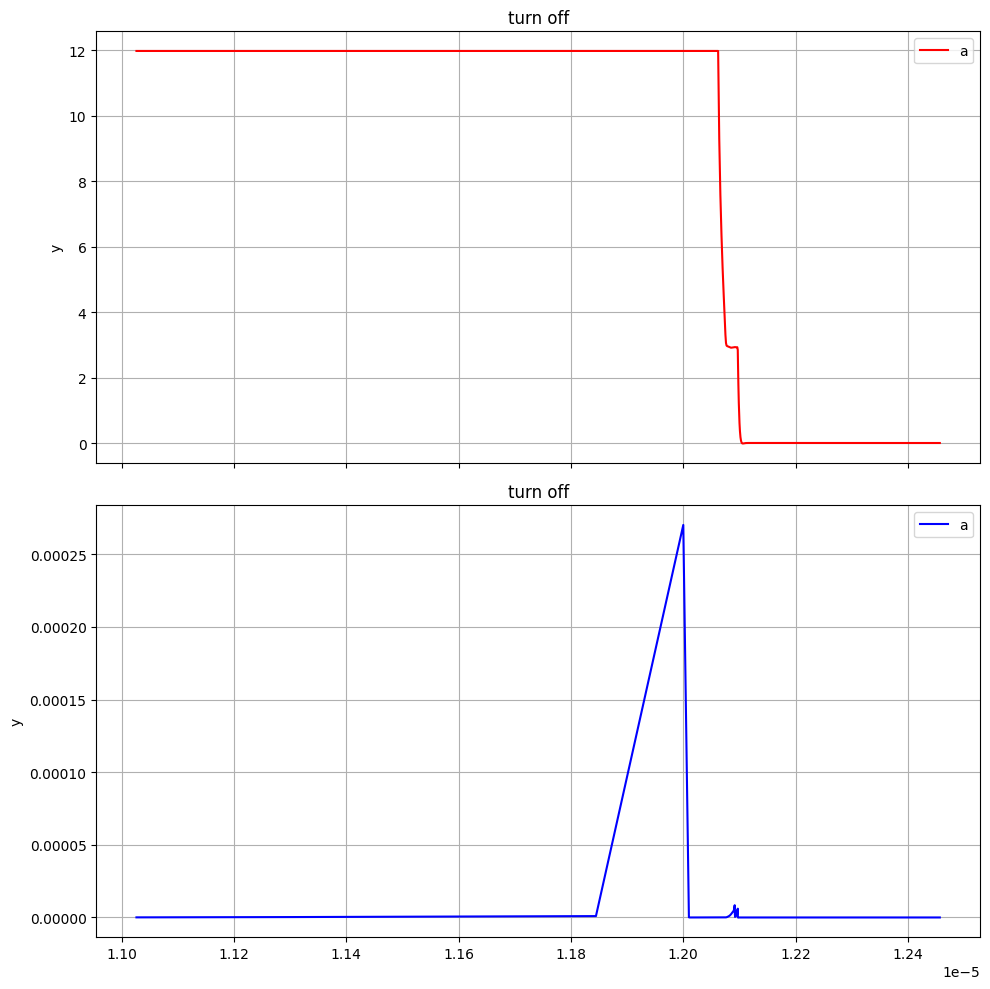

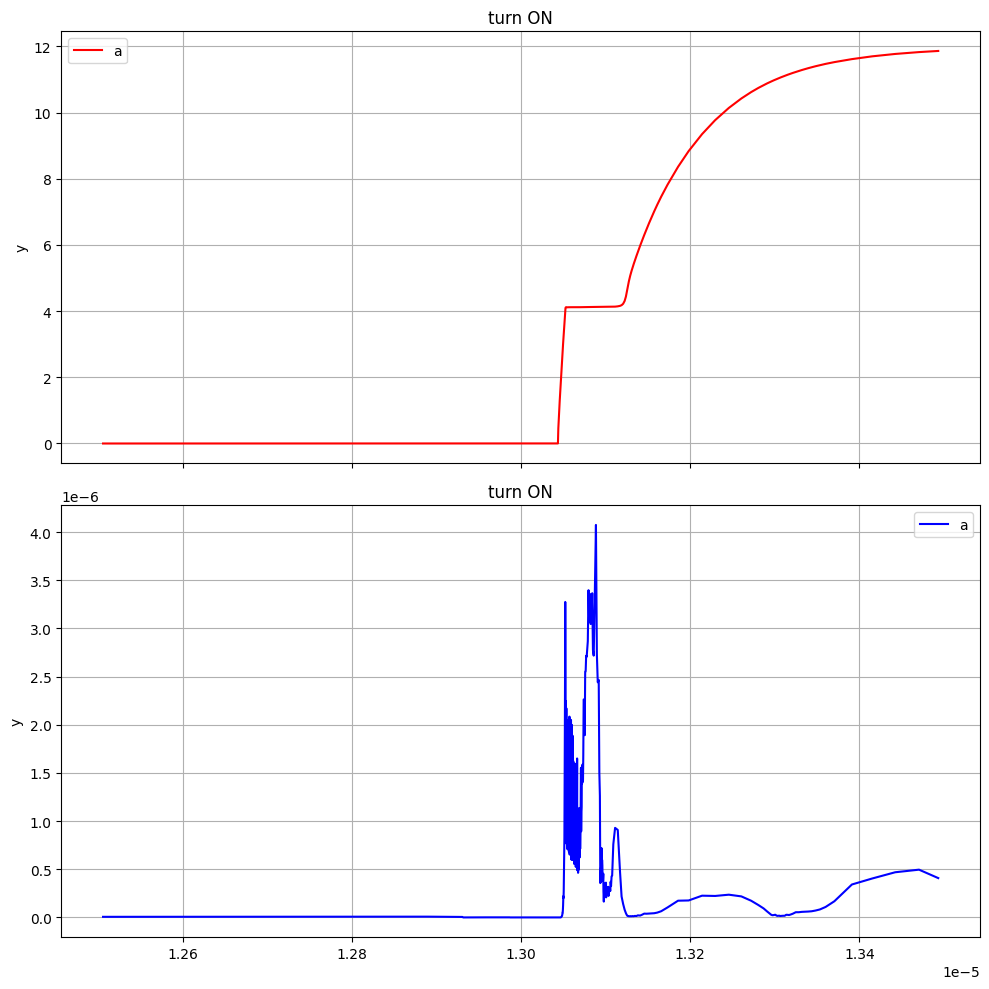

1.1000000000000001e-05 1.25e-05


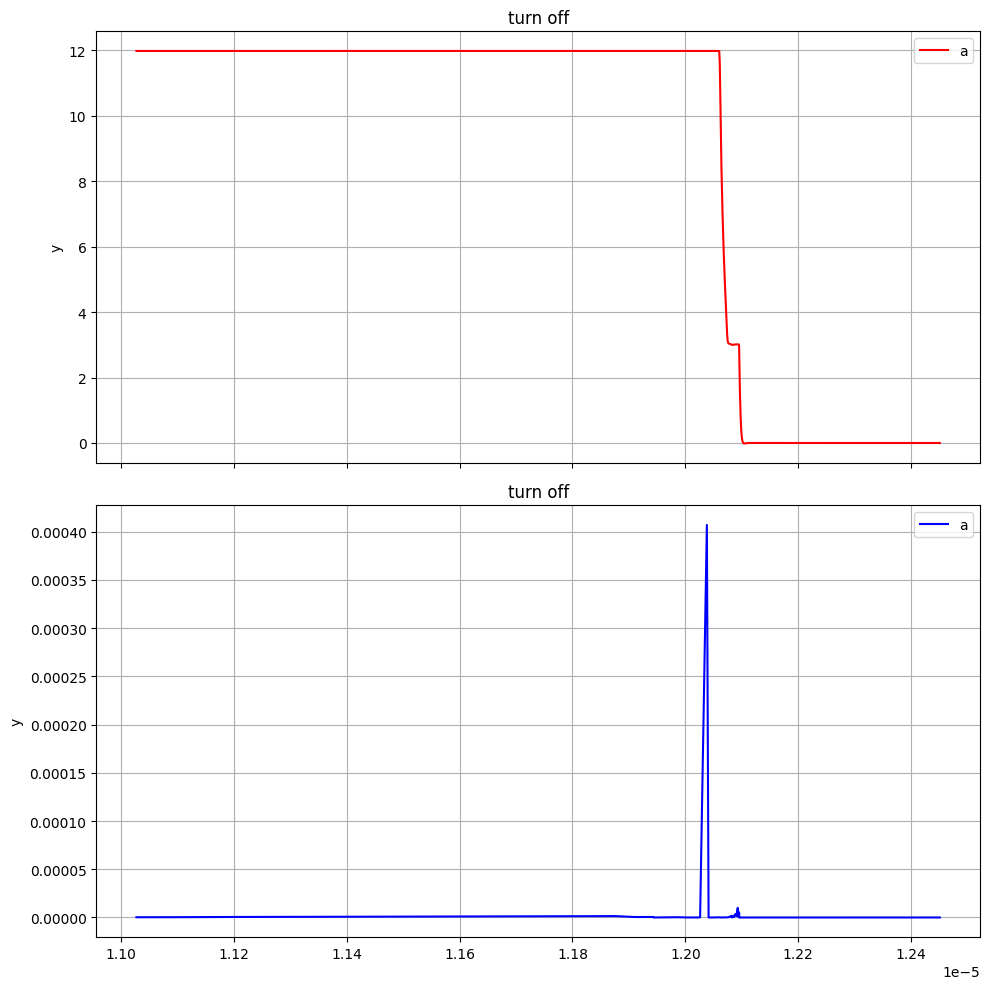

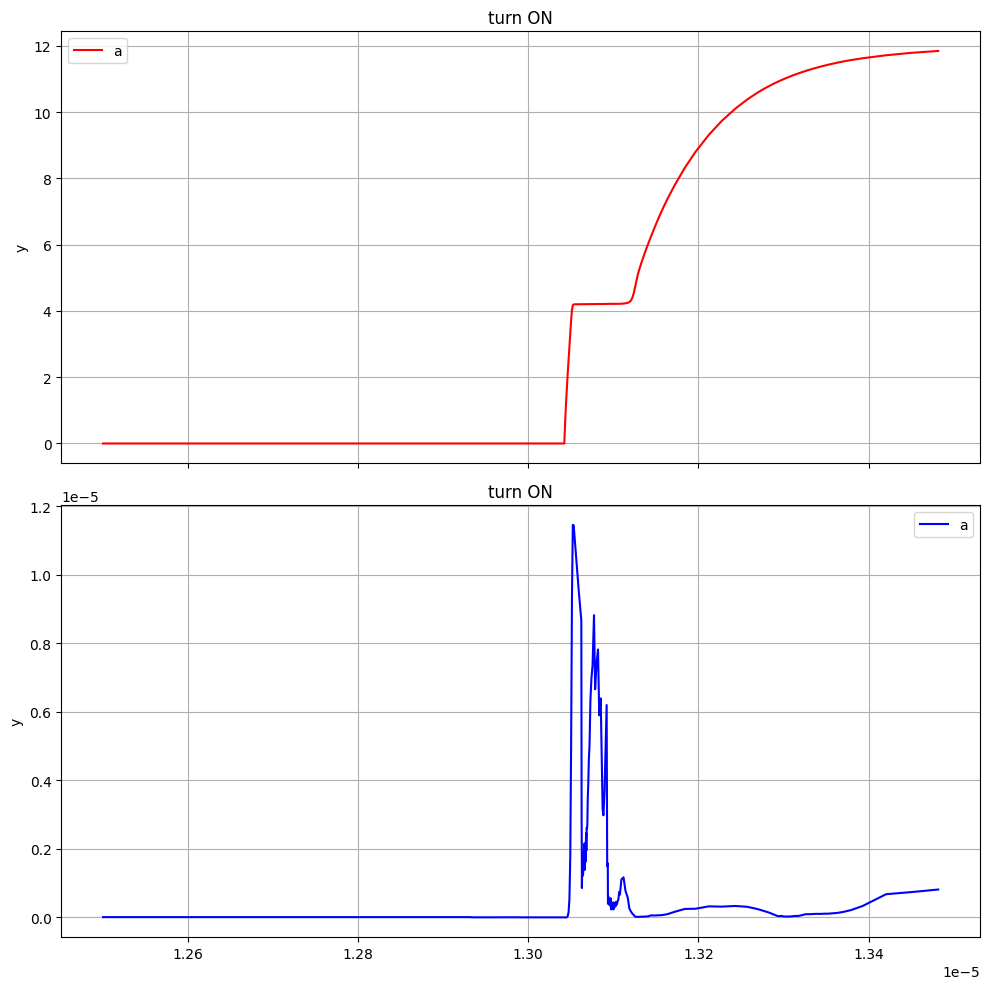

1.1000000000000001e-05 1.25e-05


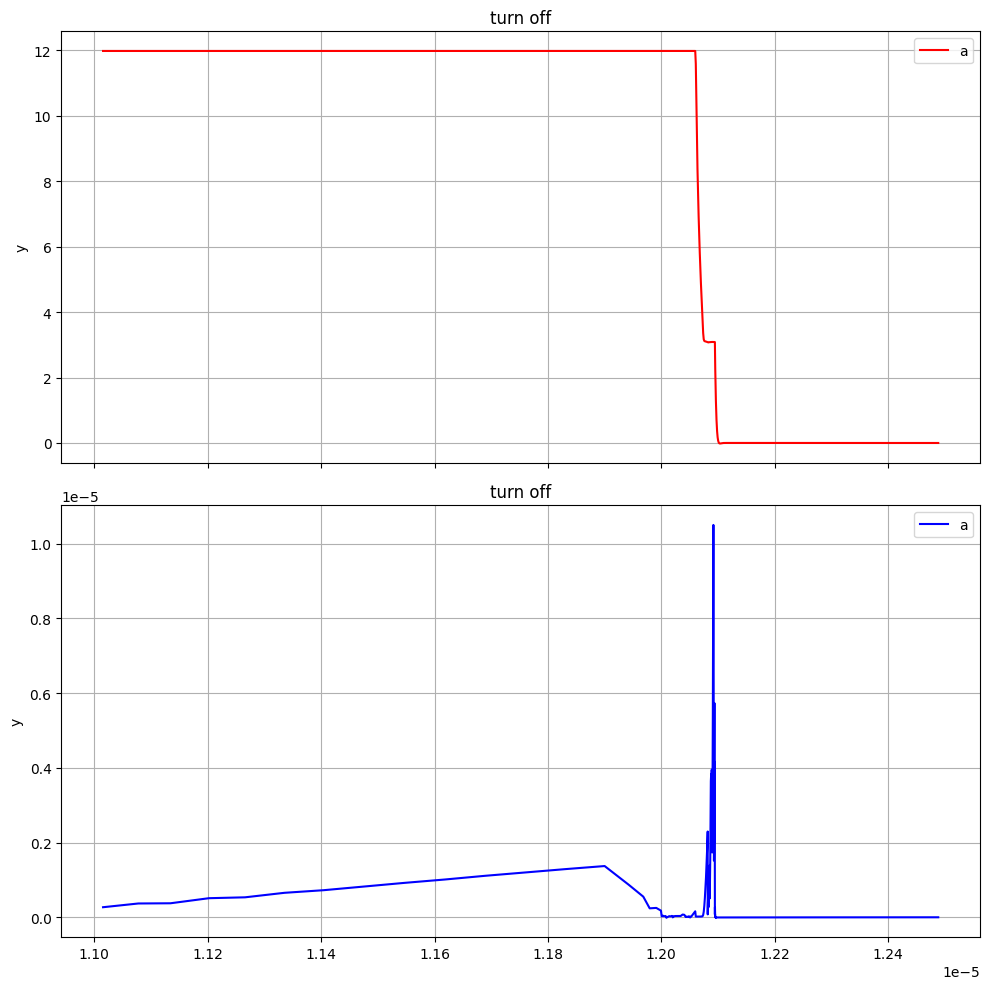

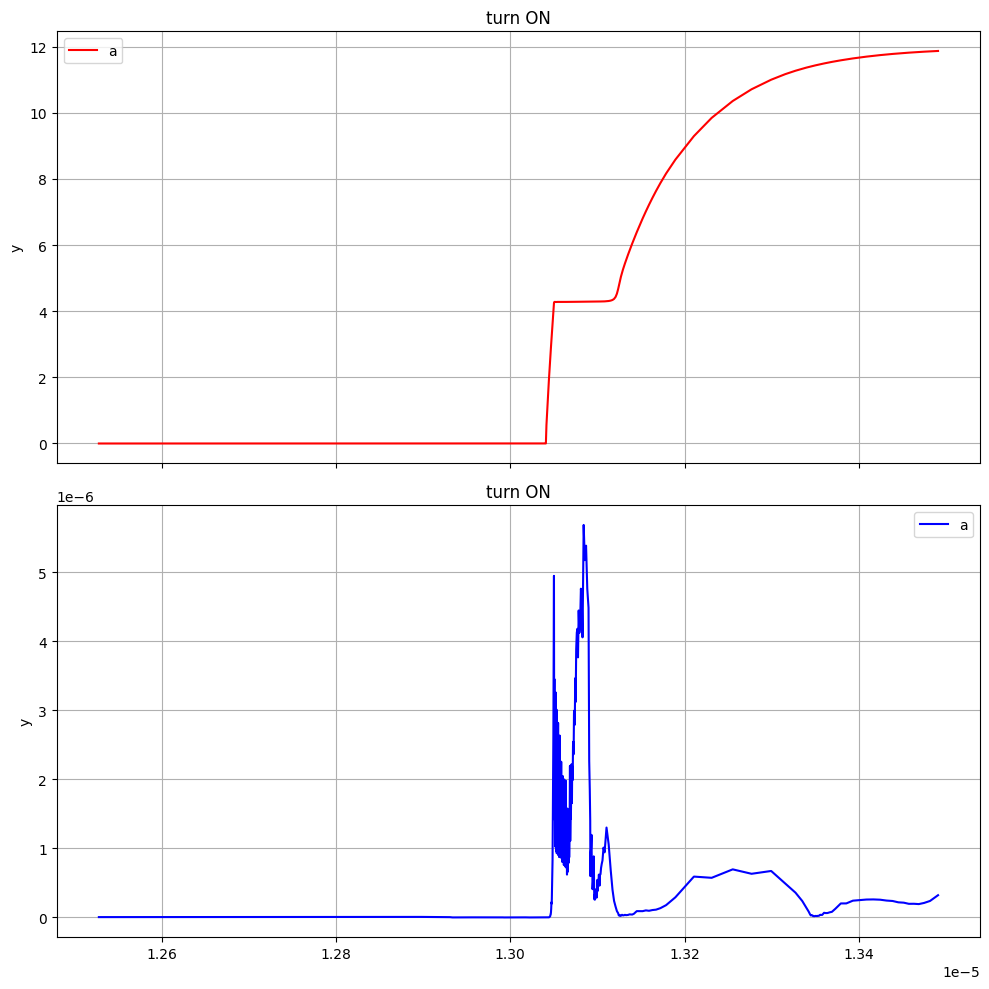

1.1000000000000001e-05 1.25e-05


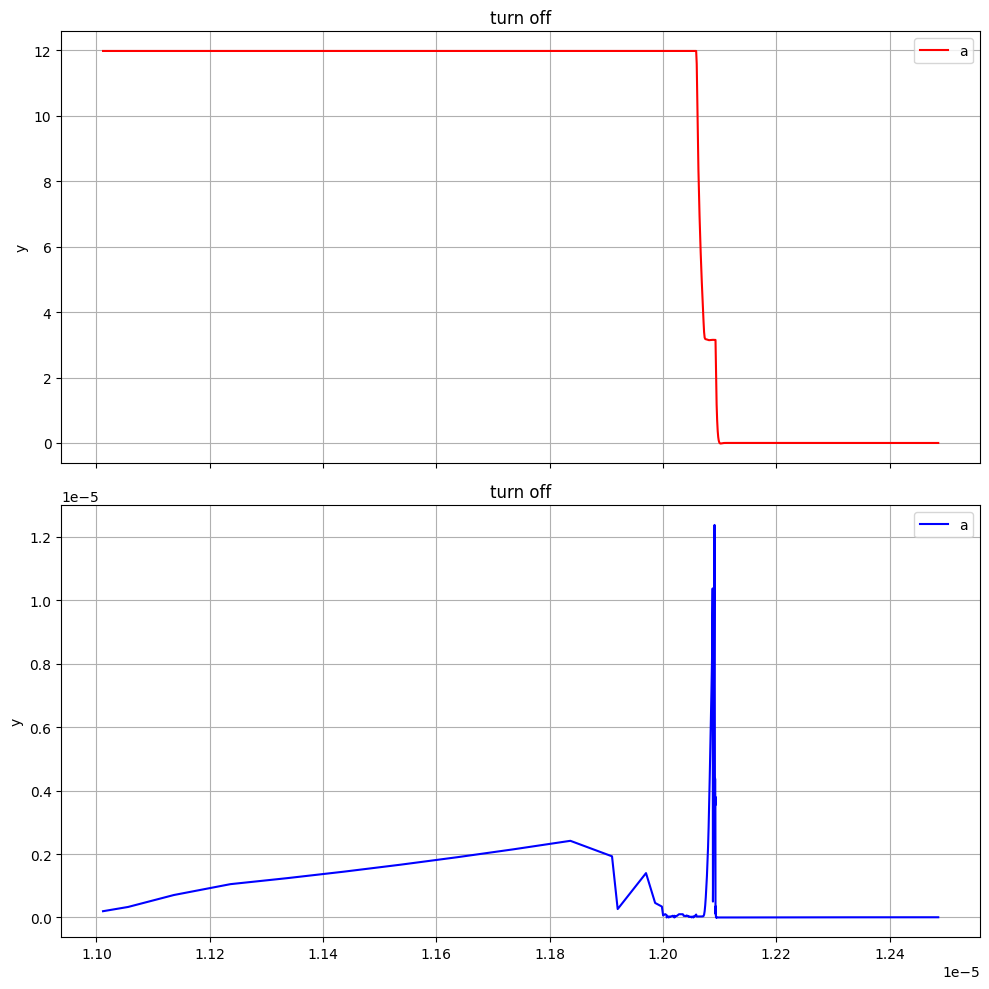

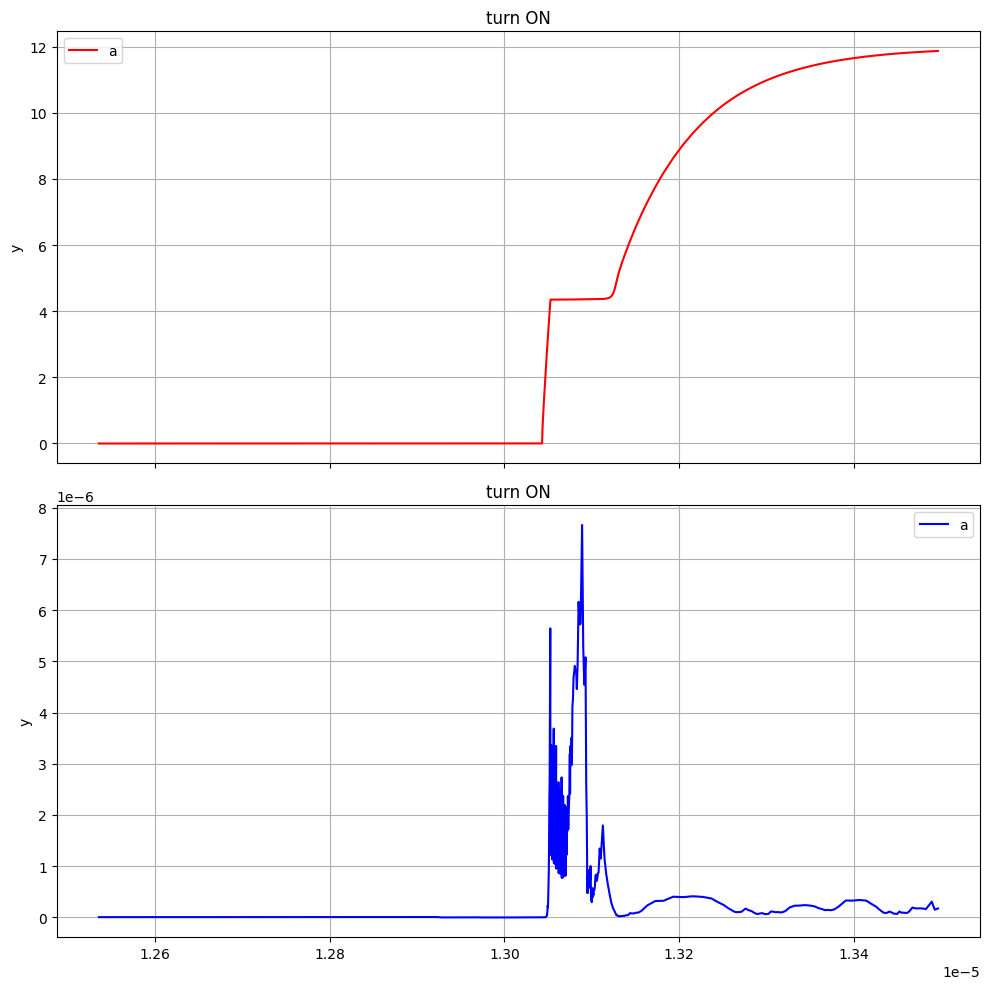

1.1000000000000001e-05 1.25e-05


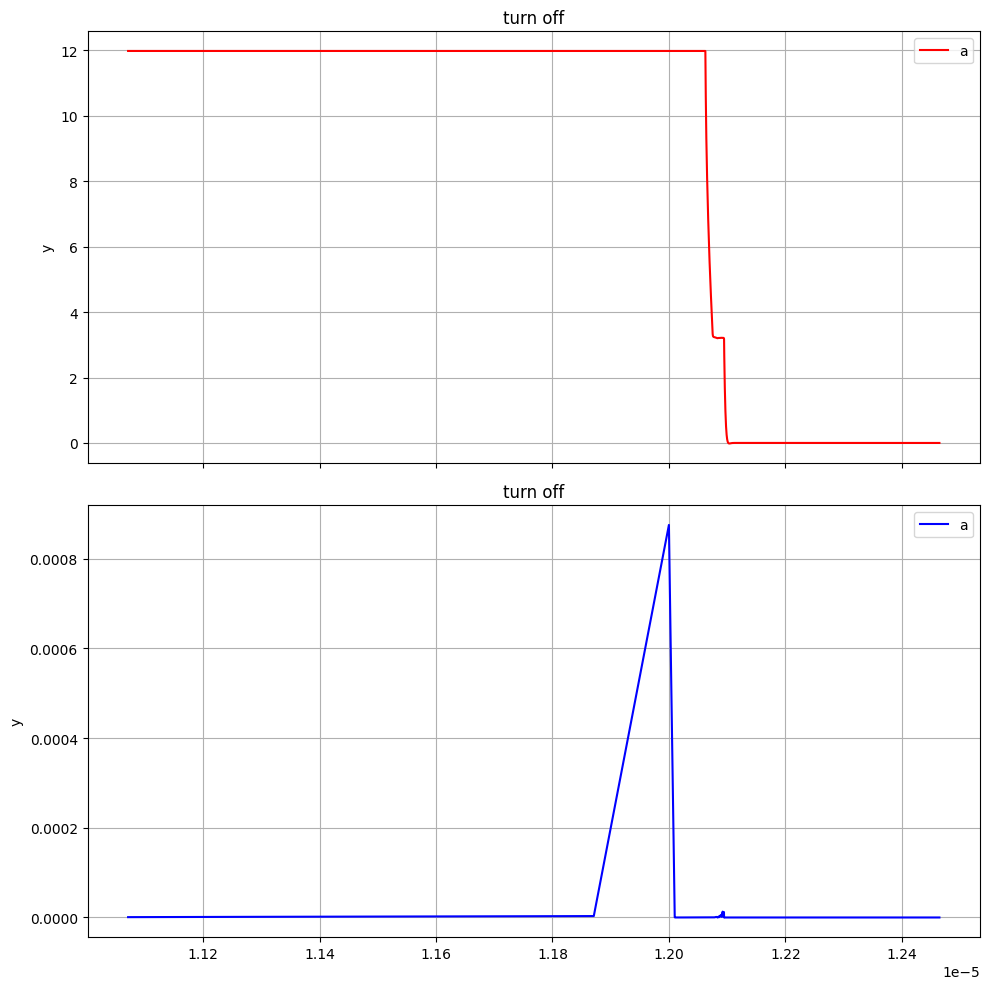

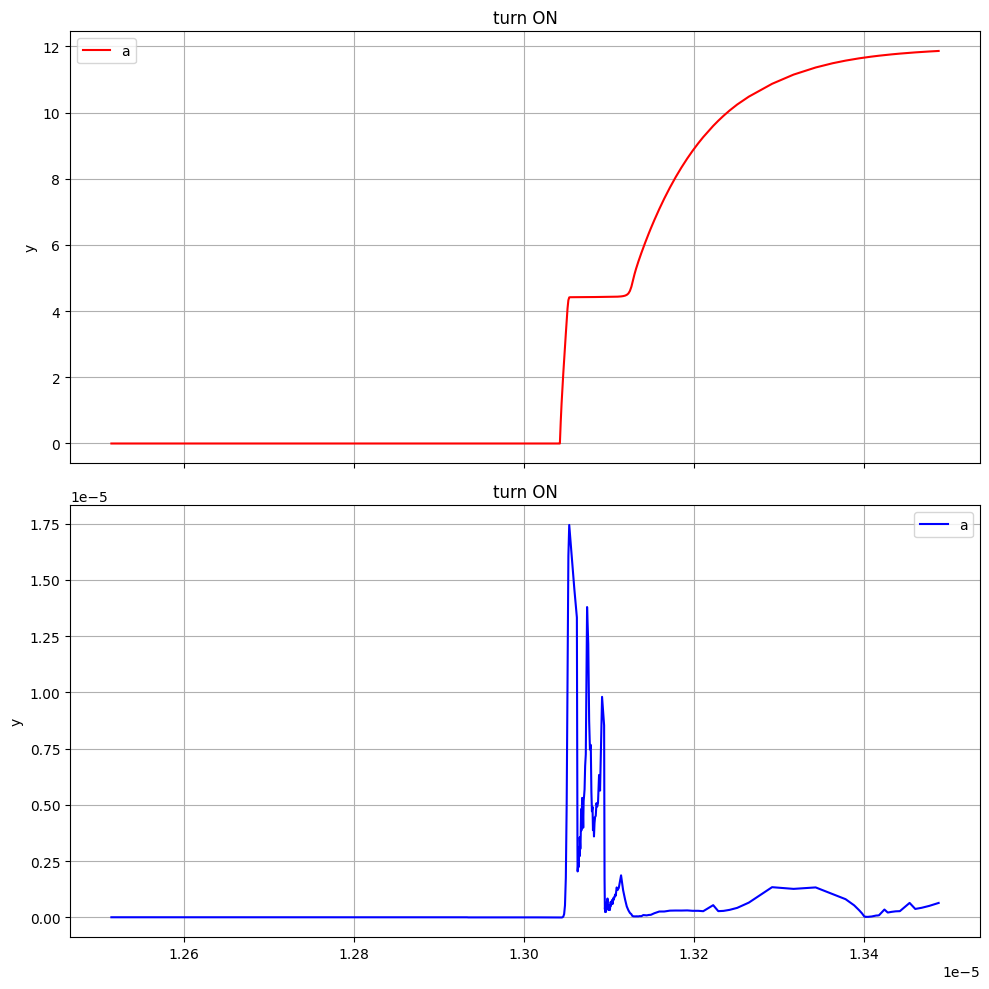

1.1000000000000001e-05 1.25e-05


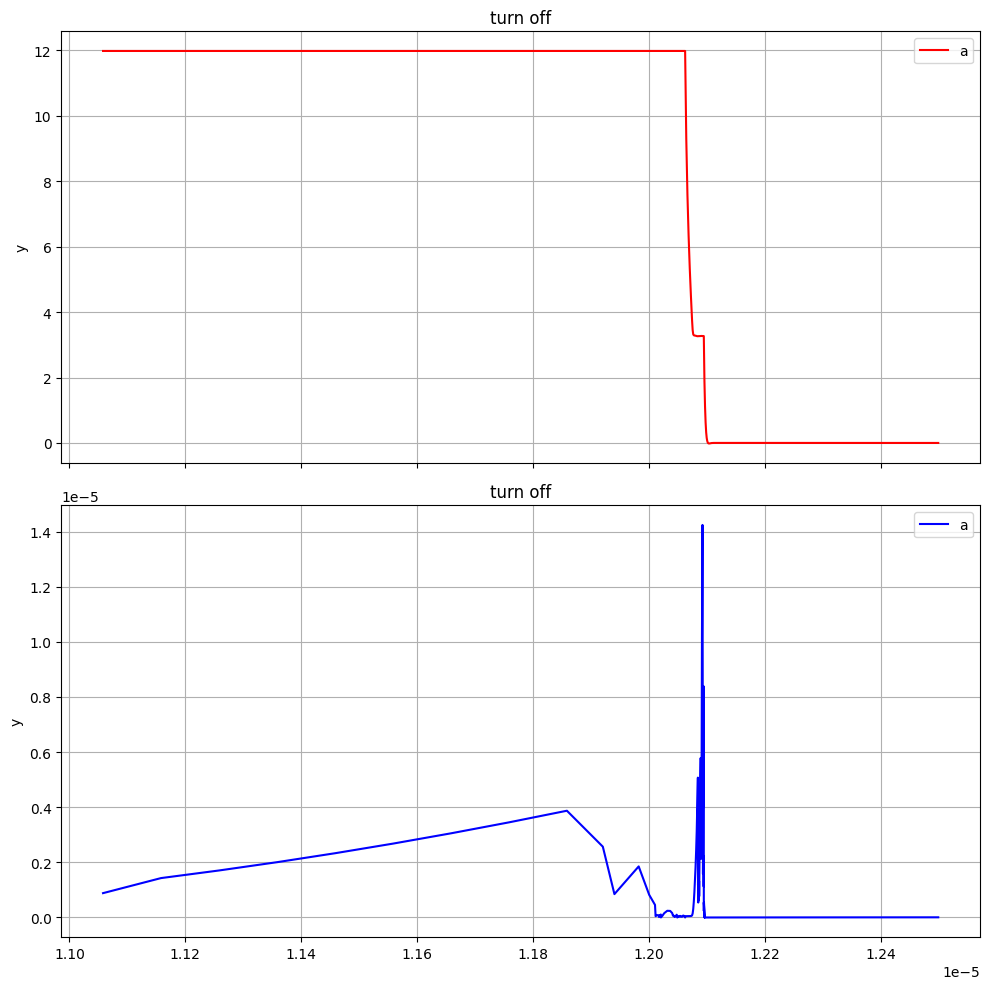

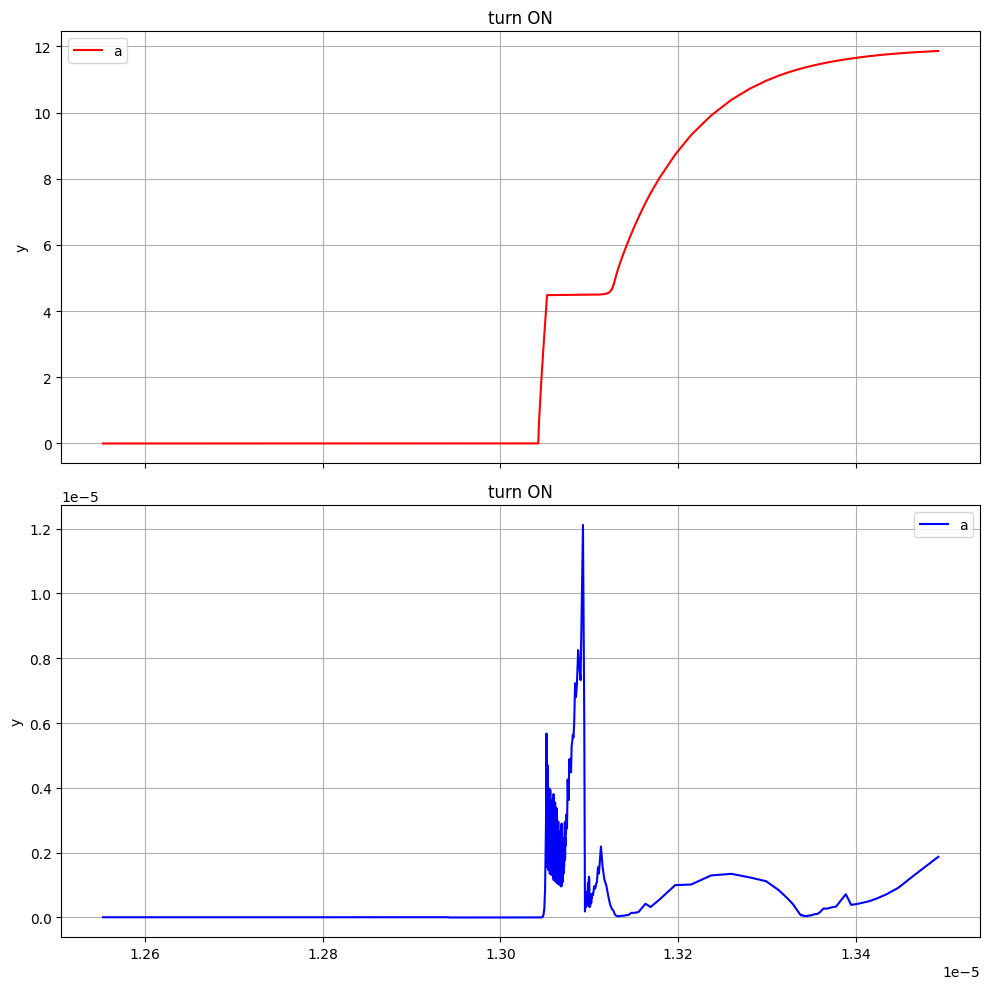

1.1000000000000001e-05 1.25e-05


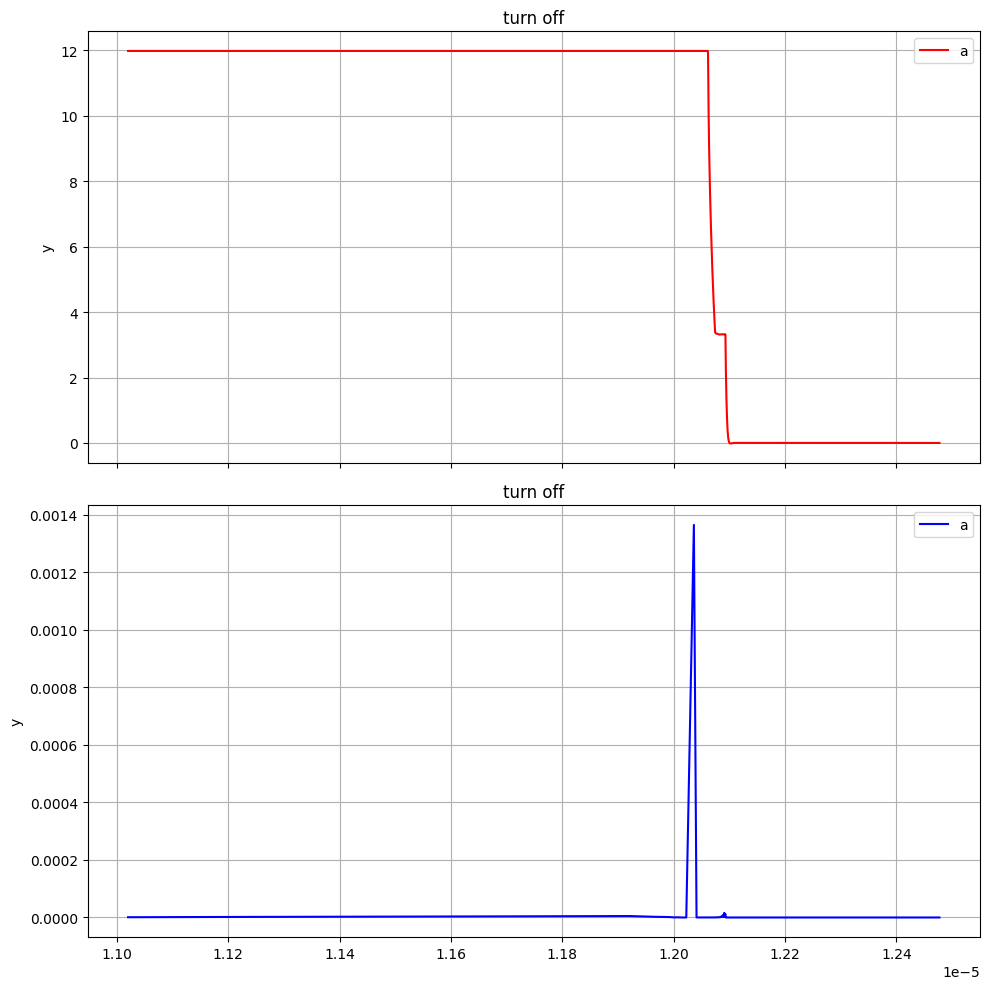

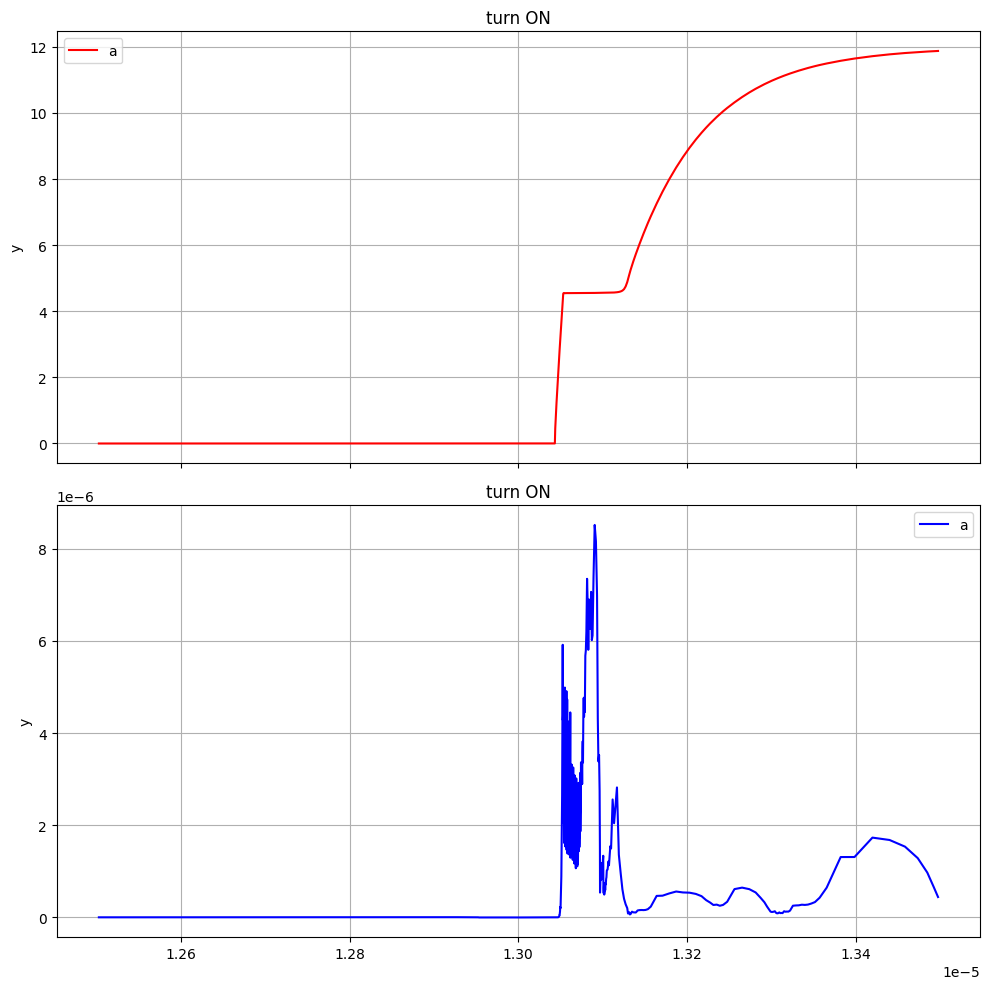

,turn_on_energy_loss,turn_off_energy_loss,static_drain_source_resistance,dc_link_voltage,load_current,first_pulse_start_time,first_pulse_on_time,second_pulse_on_time,dead_time,on_gate_resistance,dut_case_temperature
0,0.000100,0.000039,0.019510,400,10,0.00001,0.000002,0.000001,0.000001,20,20
1,0.000152,0.000055,0.019512,400,15,0.00001,0.000002,0.000001,0.000001,20,20
2,0.000205,0.000071,0.019513,400,20,0.00001,0.000002,0.000001,0.000001,20,20
3,0.000261,0.000356,0.019515,400,25,0.00001,0.000002,0.000001,0.000001,20,20
4,0.000319,0.000511,0.019517,400,30,0.00001,0.000002,0.000001,0.000001,20,20
5,0.000376,0.000123,0.019518,400,35,0.00001,0.000002,0.000001,0.000001,20,20
6,0.000435,0.000143,0.019518,400,40,0.00001,0.000002,0.000001,0.000001,20,20
7,0.000500,0.001029,0.019519,400,45,0.00001,0.000002,0.000001,0.000001,20,20
8,0.000559,0.000178,0.019523,400,50,0.00001,0.000002,0.000001,0.000001,20,20
9,0.000624,0.001559,0.019521,400,55,0.00001,0.000002,0.000001,0.000001,20,20


In [9]:

param_values = list(range(10, 60, 5))
per_device_results = {}


for dut_key, dut_data in duts_data.items():
        
    results = []
    
    source_ltspice_file_path = dut_data["file_path"]
    output_fields = dut_data["output_fields"]
    
    for param_value in param_values:
        simulation_parameters=DoublePulseTestSimulationParameters(
            dc_link_voltage=400,
            load_current=param_value,
            first_pulse_start_time=10e-6,
            first_pulse_on_time=2e-6,
            second_pulse_on_time=1e-6,
            dead_time=1e-6,
            on_gate_resistance=20,
            dut_case_temperature=20,
        )
        
        formatted_simulation_output = run_double_pulse_simulation(
            source_ltspice_file_path=source_ltspice_file_path,
            simulation_parameters=simulation_parameters,
            output_fields=output_fields,
        )
    
        result = process_simulation_output(
            formatted_simulation_output,
            simulation_parameters=simulation_parameters,
        )
        result_dict = dataclasses.asdict(result)
    
        # Calculate Dynamic RDS(on) - Use transient data (here, we assume the full range)
        result_dict.update(dataclasses.asdict(simulation_parameters))
        results.append(result_dict)
    
    dc_link_experiment_results = pd.DataFrame(results)
    per_device_results[dut_key] = dc_link_experiment_results

per_device_results["gan_v22tc65s1a1"]

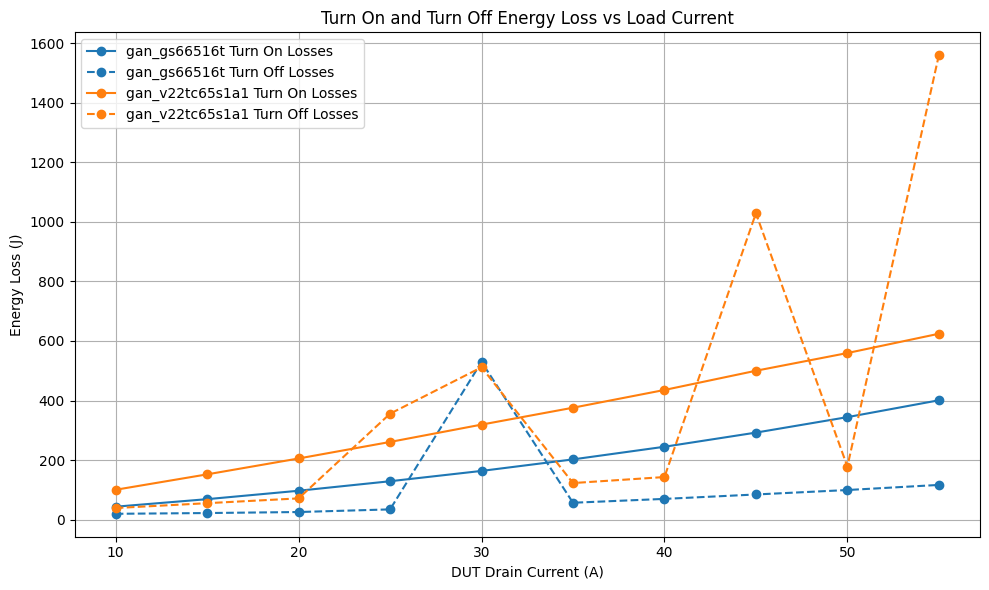

In [6]:

# Plot the total energy loss vs. DC link voltage for both devices
plt.figure(figsize=(10, 6))
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

for device_key, results in per_device_results.items():
    color = next(color_cycle) 
    plt.plot(
        results["load_current"], 
        results["turn_on_energy_loss"] * 1e6, 
        marker='o', 
        label=f"{device_key} Turn On Losses",
        color=color,
    )
    plt.plot(
        results["load_current"], 
        results["turn_off_energy_loss"] * 1e6, marker='o', 
        linestyle='--', 
        label=f"{device_key} Turn Off Losses",
        color=color,
    )
    

# Label the plot
plt.title("Turn On and Turn Off Energy Loss vs Load Current")
plt.xlabel("DUT Drain Current (A)")
plt.ylabel("Energy Loss (J)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

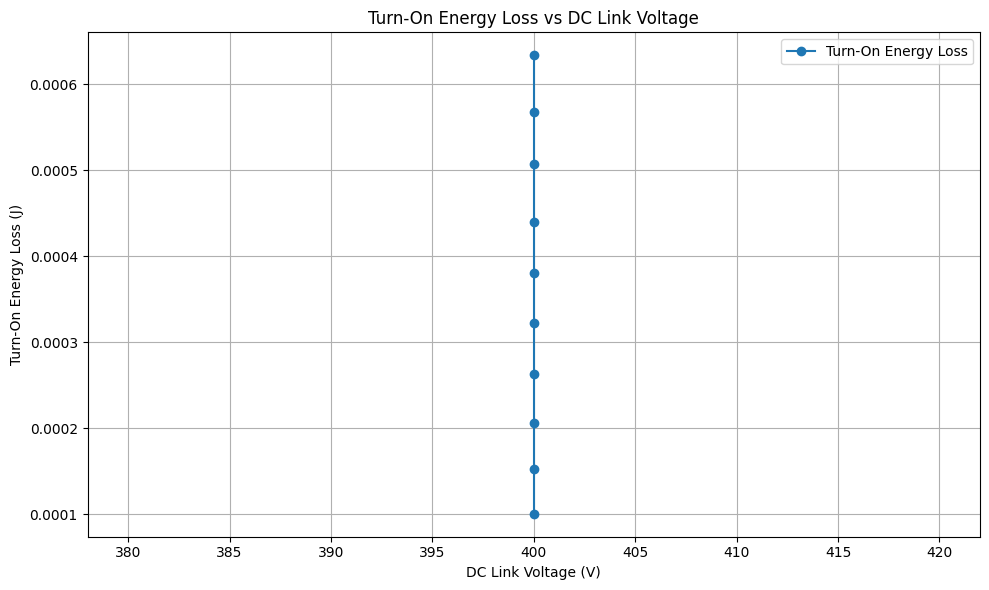

In [4]:

# Plotting the turn-on energy loss against DC link voltage
plt.figure(figsize=(10, 6))
plt.plot(dc_link_experiment_results['dc_link_voltage'], dc_link_experiment_results['turn_on_energy_loss'] + dc_link_experiment_results['turn_off_energy_loss'], marker='o', label='Turn-On Energy Loss')

# Labeling the plot
plt.title('Turn-On Energy Loss vs DC Link Voltage')
plt.xlabel('DC Link Voltage (V)')
plt.ylabel('Turn-On Energy Loss (J)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()